
# **Assignment 2-2024**



This notebook has four parts.

- **[Part I]:  The K-Nearest Neighbors (KNN) Algorithm**
- **[Part II]: Support Vector Machines Algorithm**
- **[Part III]:  The Gradient-Boosting Algorithm.**
- **[Part IV]: Extreme Gradient Boosting(XGBoost)Algorithm**


Provided by Behrad Binaei Haghighi










In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from IPython.display import Image

## **Part I**

**The K-Nearest Neighbors (KNN) Algorithm**
**The KNN model is a supervised machine learning model. The KNN model is also one of the simpler models.**



### **Mathematical Definition of Nearest Neighbors**
**The definition of nearest neighbors is based on the computation of the** **Euclidean distance from the new data point to each of the existing data**
$$ d(p,q) = \sqrt {{{({p_1} - {q_1})}^2} + {{({p_2} - {q_2})}^2} + ...{{({p_n} - {q_n})}^2}}$$

**When we use the kNN algorithm, we need to identify the closest neighbors. Once we have identified the k neighbors that are closest to our new data point, we do not yet have a prediction. There is one step remaining to convert the multiple neighbors into one prediction. There are two prevalent methods for it.**


- 1.The first method is to take the average of the target value of the k nearest neighbors. This average is then used as the prediction.

- 2.The second method is to take the weighted average of the k nearest neighbors and use their distances as the inverse weight so that closer points are weighted heavier in the prediction.


### **Deciding on the Number of Neighbors k**
How many nearest neighbors should we include in the prediction? The value of k decides this. To apply this, let us see two cases – one nearest neighbor and three nearest neighbors – and see the difference in prediction. The two are given in the figure below



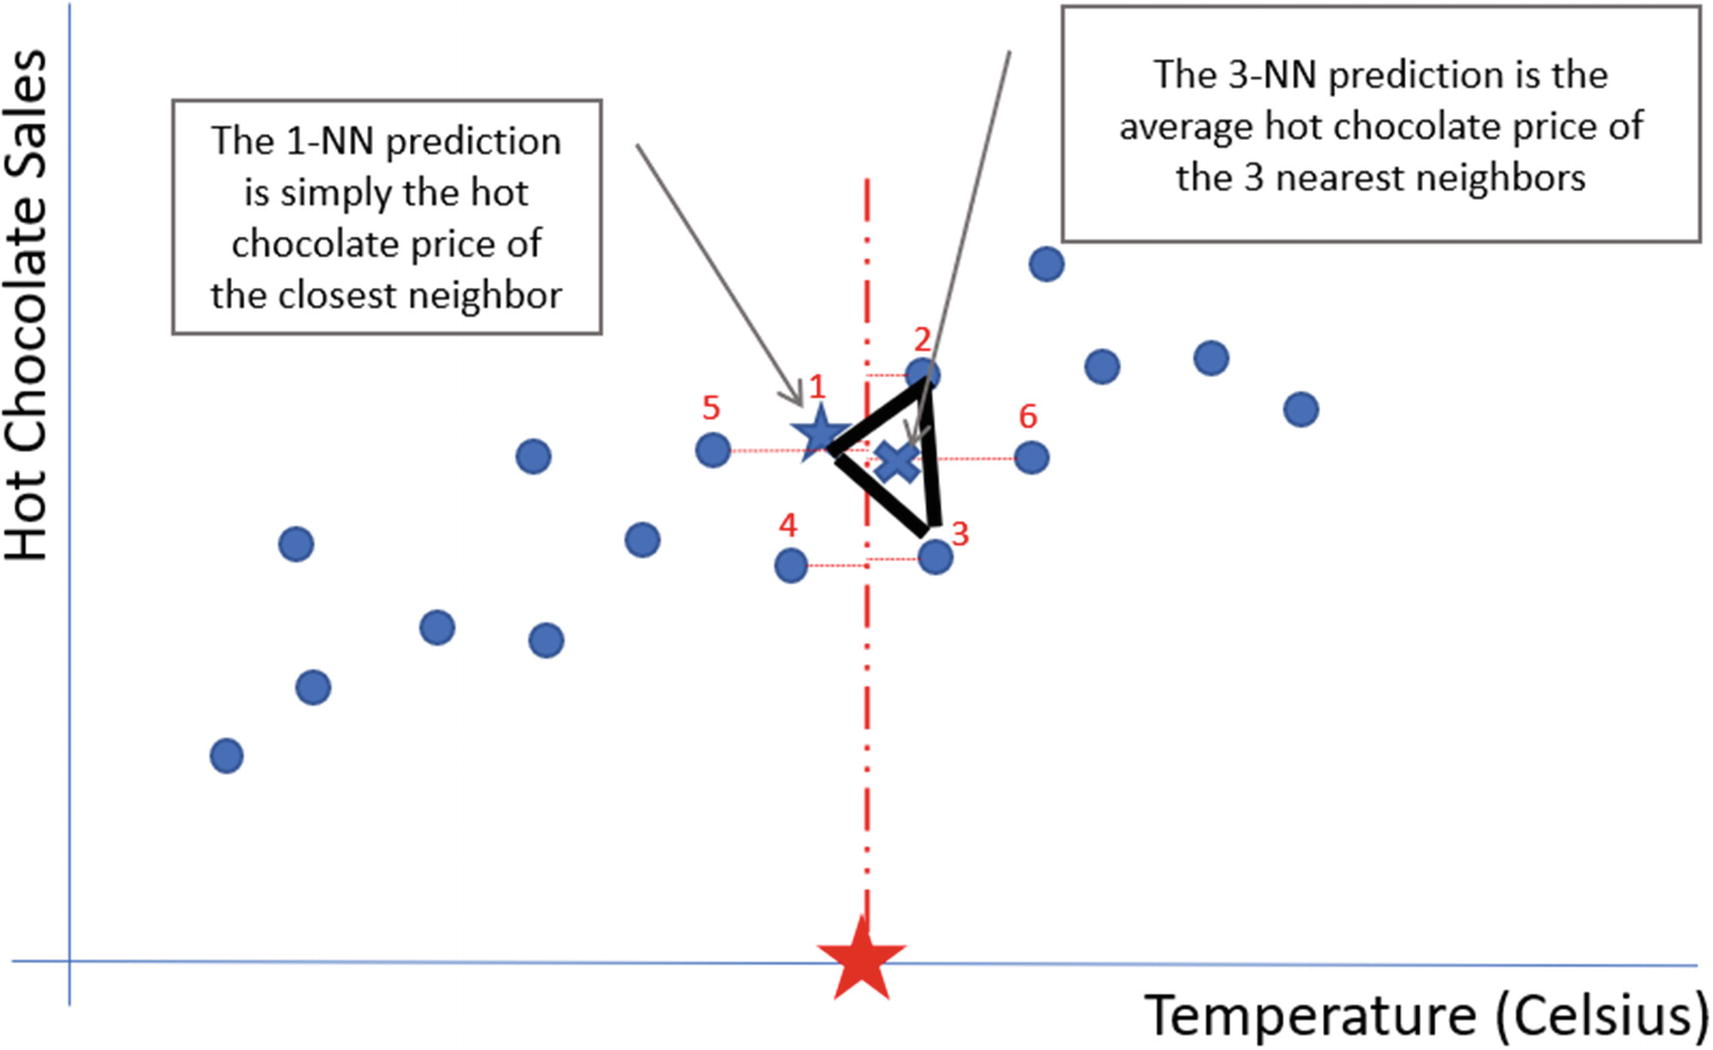

In [43]:
Image(filename='/content/drive/MyDrive/Images-Slides-2024/KNN.jpg', width=900,height=900)

### Dataset
Let's consider the same small dataset with one feature (e.g., age) and a target variable with two classes (A and B):

| Age | Class |
|-----|-------|
| 25 | A |
| 30 | A |
| 45 | B |
| 50 | B |
| 60 | B |
| 35 | A |

For simplicity, let's assume that the class labels are represented as numerical values: A=0 and B=1.

### Task
We want to predict the class for a new data point with an age of 40 using KNN with \( k=3 \).

### Steps

1. **Calculate the Distance**:
   - Compute the distance from the new data point (40) to each data point in the dataset.
   - Since the data is one-dimensional, the distance is simply the absolute difference between the points.

2. **Sort the Distances**:
   - Sort these distances to find the nearest neighbors.

3. **Identify the Nearest Neighbors**:
   - Pick the k (in this case, 3) nearest neighbors.

4. **Predict Using Method 1: Average of k Nearest Neighbors**:
   - Calculate the average target value of the k nearest neighbors.

5. **Predict Using Method 2: Weighted Average of k Nearest Neighbors**:
   - Calculate the weighted average target value of the k nearest neighbors, using their distances as the inverse weight.

### Detailed Calculation

1. **Calculate the Distance**:

   - Distance from 40 to 25: \( |40 - 25| = 15 \)
   - Distance from 40 to 30: \( |40 - 30| = 10 \)
   - Distance from 40 to 45: \( |40 - 45| = 5 \)
   - Distance from 40 to 50: \( |40 - 50| = 10 \)
   - Distance from 40 to 60: \( |40 - 60| = 20 \)
   - Distance from 40 to 35: \( |40 - 35| = 5 \)

2. **Sort the Distances**:

   - \( |40 - 45| = 5 \) (Class B, value = 1)
   - \( |40 - 35| = 5 \) (Class A, value = 0)
   - \( |40 - 30| = 10 \) (Class A, value = 0)
   - \( |40 - 50| = 10 \) (Class B, value = 1)
   - \( |40 - 25| = 15 \) (Class A, value = 0)
   - \( |40 - 60| = 20 \) (Class B, value = 1)

3. **Identify the Nearest Neighbors**:
   - The 3 nearest neighbors are: 
     - Age 45 (Class B, value = 1)
     - Age 35 (Class A, value = 0)
     - Age 30 (Class A, value = 0)

4. **Predict Using Method 1: Average of k Nearest Neighbors**:

   - Average = $ \frac{1 + 0 + 0}{3} = \frac{1}{3} \approx 0.33 $

5. **Predict Using Method 2: Weighted Average of k Nearest Neighbors**:

   - Weight for Age 45 = $ \frac{1}{5} = 0.2 $
   - Weight for Age 35 = $ \frac{1}{5} = 0.2 $
   - Weight for Age 30 = $ \frac{1}{10} = 0.1 $

   - Weighted Average = $ \frac{(1 \times 0.2) + (0 \times 0.2) + (0 \times 0.1)}{0.2 + 0.2 + 0.1} = \frac{0.2}{0.5} = 0.4 $

### Summary
- **Method 1: Average of k Nearest Neighbors**: The predicted value for the new data point with an age of 40 is approximately 0.33, which would be classified as Class A (closer to 0).
- **Method 2: Weighted Average of k Nearest Neighbors**: The predicted value for the new data point with an age of 40 is 0.4, which would also be classified as Class A (closer to 0).

In this particular example, both methods resulted in a prediction closer to Class A. However, the weighted average method gave a slightly higher value due to the influence of the closer neighbor with Class B.

#### **1.Import libraries.**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

#### **2. Import the traffic data.**

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Metro-Data/Metro_Interstate_Traffic_Volume.csv')

#### **3. The seasonality variables are necessary for the modeling here. We create Year, Month, Weekday, Hour, IsHoliday.**

In [5]:
data['year'] = data['date_time'].apply(lambda x: x[:4])
data['month'] = data['date_time'].apply(lambda x: x[5:7])
data['weekday'] = pd.to_datetime(data['date_time']).apply(lambda x: x.weekday())
data['hour'] = pd.to_datetime(data['date_time']).apply(lambda x: x.hour)
data['isholiday'] = (data['holiday'] == 'None').apply(float)


#### 4 
- A. Feature engineering to create the additional explanatory variables.
- B. Split the data into train and test and fit a default kNN model.
- C. Obtain the R2


In [6]:
X = data[['year', 'month', 'weekday', 'hour', 'isholiday']]
y = data['traffic_volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=12345, shuffle=False)
my_dt = KNeighborsRegressor()
my_dt.fit(X_train, y_train)
fcst = my_dt.predict(X_test)
print(r2_score(list(y_test), list(fcst)))


0.970238265560862


#### **5. Verify our results visually.**

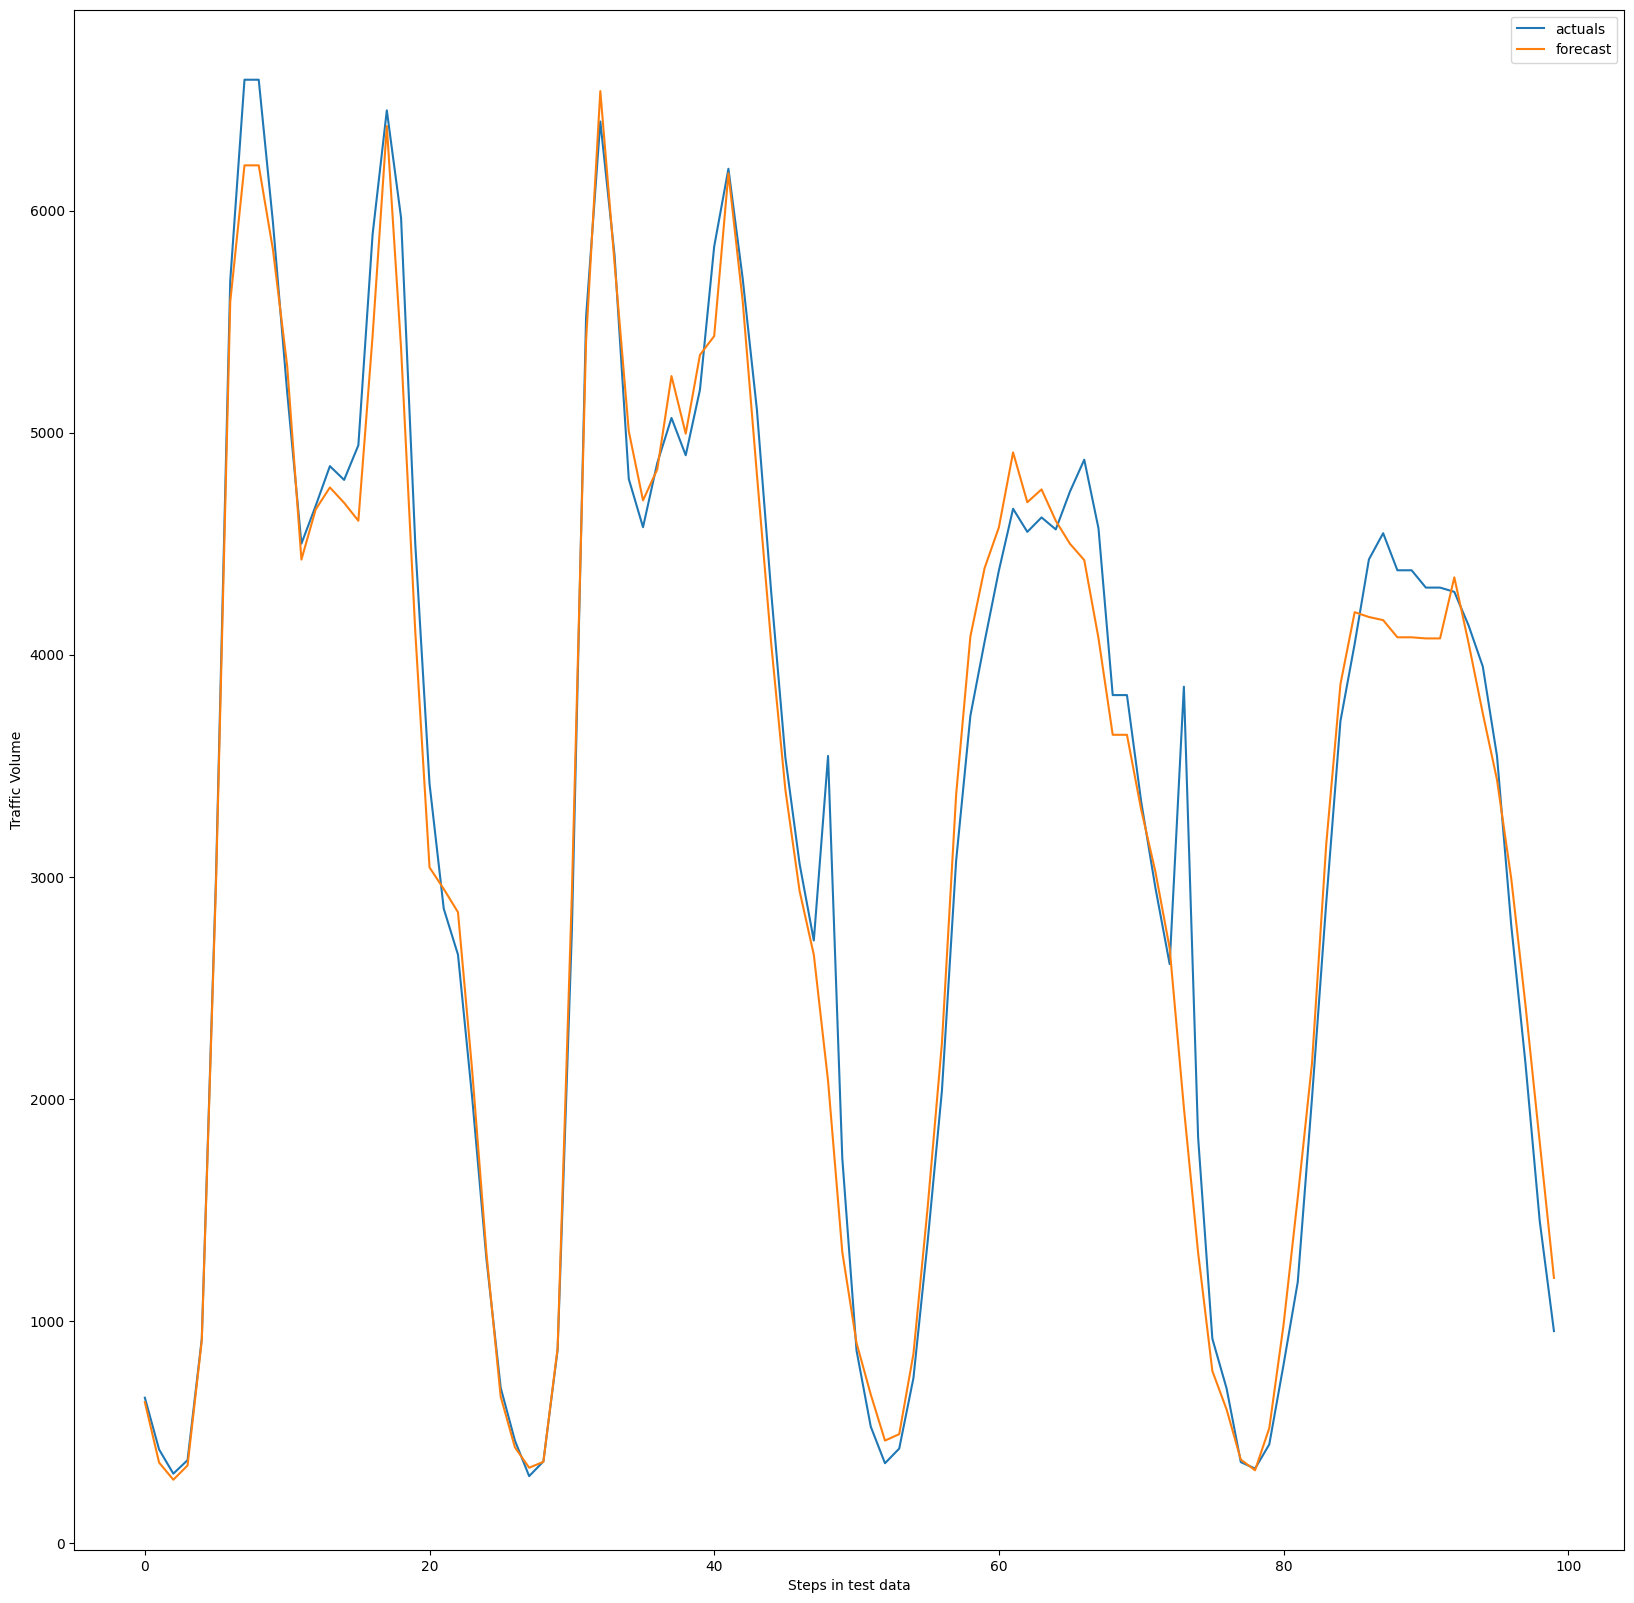

In [7]:
plt.figure(figsize=(10,10))
plt.plot(list(y_test))
plt.plot(list(fcst))
plt.legend(['actuals', 'forecast'])
plt.ylabel('Traffic Volume')
plt.xlabel('Steps in test data')
plt.show()


## **Part II**
### **Support Vector Machines Algorithm**

### Overview

The fundamental idea behind Support Vector Machines is to fit the largest possible street/margin between the decision boundary that separates the two classes and the training instances.

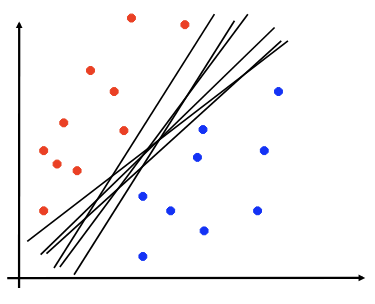

$$\text{hyperplane equation: } \mathbf{w \cdot x + b = 0}$$


The decision boundary is entirely determined by the support vectors. Any instance that is not a support vector (i.e., is off the street/margin) has no influence whatsoever; you could remove them, add more instances, or move them around, and as long as they stay off the street, they will not affect the decision boundary. Computing the predictions only involve the support vectors, not the whole training set.

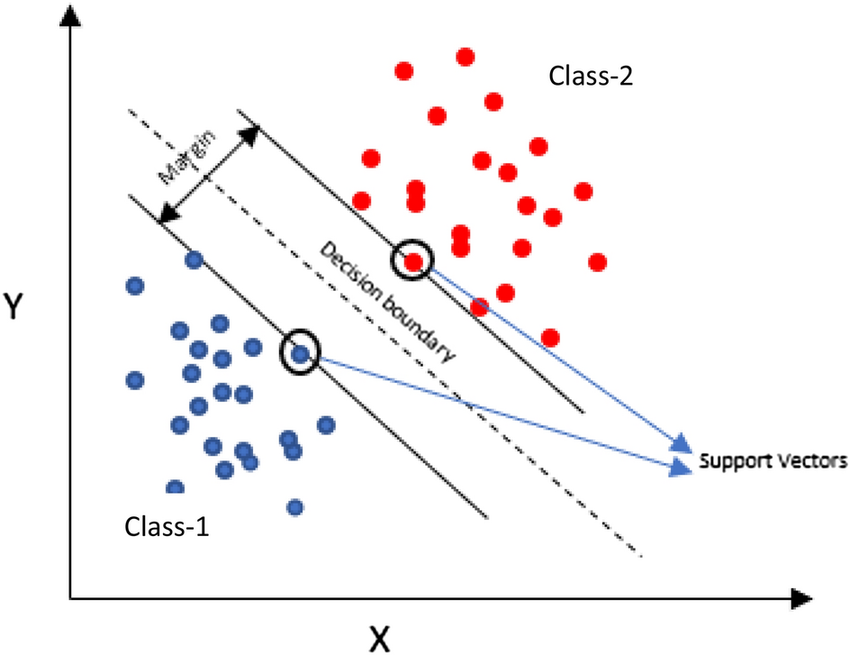

In [3]:
Image(filename='images\SVM-Classifier-representative-illustration.png', width=600,height=600)

$$\text{class 1 margin equation: } \mathbf{w \cdot x + b = -1} \\ \text{ class 2 margin equation: } \mathbf{w \cdot x + b = 1}$$

The reason we assign these lines as -1 and 1 is We even if we multiply the whole equation with some other number the line doesn't change. In other words, by adjusting the w and b parameters, we can convert any number to 1 and -1 at the right hand side of the equations. Hence for mathematical convenience, we take it as 1 and -1.

Note that X referres to feature vector of each point. Also, as seen in the figure, the margin lines go through the support vectors meaning they are only affected by the support vectors and the change in any other data point wouldn't affect them in any way.

$$ \pmb{w^T x} + \beta = 0 $$
They are the red and blue points in the above figure. Without allowing any misclassifications in the hard margin SVM, we want to maximize the distance between the two hyperplanes. To find this distance, we can use the formula for the distance of a point from a plane. So the distance of the blue points and the red point from the black line would respectively be:

  $$ \frac {|\pmb{w^T x} + \alpha|}{||\pmb{w}||} \hspace{2mm} \textnormal{and} \hspace{2mm} \frac {|\pmb{w^T x} + \beta|}{||\pmb{w}||} $$

As a result, the total margin would become:

  $$ \frac{|\alpha - \beta|}{||\pmb{w}||} $$



We want to maximize this margin. Without the loss of generality, we can consider $\alpha = b + 1$ and $\beta = b - 1$. Subsequently, the problem would be to maximize $\frac{2}{||\pmb{w}||}$ or minimize $\frac{||\pmb{w}||}{2}$. To make the problem easier when taking the gradients, we’ll, instead, word with its squared form:

  $$ \mathop{\textnormal{min}}_{\pmb{w}, b} \hspace{2mm} \frac{1}{2} ||\pmb{w}||^2 \equiv \mathop{\textnormal{min}}_{\pmb{w}, b} \hspace{2mm} \frac{1}{2} \pmb{w}^T \pmb{w} $$

### Example 1: Linearly Separable Data (Hard Margin Linear SVM)

Here is our dataset that has two feature and a label. The two classes are easly separable by a line.

#### Dataset:

X = [[2, 3], [3, 3], [3, 4], [5, 5], [1, 1], [2, 1]]
y = [1, 1, 1, 1, -1, -1]


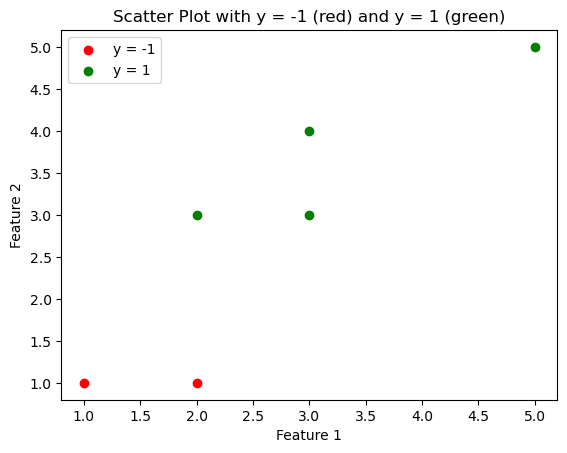

In [2]:
import matplotlib.pyplot as plt
import numpy as np


X = np.array([[2, 3], [3, 3], [3, 4], [5, 5], [1, 1], [2, 1]])
y = np.array([1, 1, 1, 1, -1, -1])

red_points = X[y == -1]
green_points = X[y == 1]


plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='y = -1')
plt.scatter(green_points[:, 0], green_points[:, 1], color='green', label='y = 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot with y = -1 (red) and y = 1 (green)')
plt.legend()
plt.show()


This optimization comes with some constraints. Let’s assume that the labels for our classes are {-1, +1}. When classifying the data points, we want the points belonging to positives classes to be greater than +1,  meaning $\pmb{w}^T \pmb{x} + b \geq 1$, and the points belonging to the negative classes to be less than -1, i.e. $\pmb{w}^T \pmb{x} + b \leq -1$.

Our goal is to find the optimized hyperplane that separates the classes using a hard margin linear SVM.

#### Step-by-Step Solution:

1. **Formulate the SVM Optimization Problem:**

   For a hard margin linear SVM, we need to maximize the margin between two classes while ensuring that all points are correctly classified. This can be expressed as:

   $
   \min_{w, b} \frac{1}{2} \|w\|^2
   $

   Subject to:

   $
   y_i (w \cdot x_i + b) \geq 1, \quad \forall i
   $

2. **Identify the Support Vectors:**

   - In this dataset, the points `[2, 3]` and `[2, 1]` are the closest to the decision boundary and will be our support vectors.
   - Let's assume the decision boundary equation is $w \cdot x + b = 0$.
   - The margin boundaries will be at $w \cdot x + b = 1$ and $w \cdot x + b = -1$.

3. **Calculate the Hyperplane:**

   - For support vector `[2, 3]` (class 1): $2w_1 + 3w_2 + b = 1$
   - For support vector `[2, 1]` (class -1):$2w_1 + w_2 + b = -1$

   Solving these two equations simultaneously:
   $
   \begin{cases}
   2w_1 + 3w_2 + b = 1 \\
   2w_1 + w_2 + b = -1
   \end{cases}
   $

   Subtract the second equation from the first:
   $
   2w_2 = 2 \quad \Rightarrow \quad w_2 = 1
   $

   Substitute $w_2$ into one of the equations:
   $
   2w_1 + 3(1) + b = 1 \quad \Rightarrow \quad 2w_1 + 3 + b = 1 \quad \Rightarrow \quad 2w_1 + b = -2
   $

   Substitute into the second equation:
   $
   2w_1 + 1 + b = -1 \quad \Rightarrow \quad 2w_1 + b = -2
   $

   Thus, we can conclude $w_1 = 0$ and $b = -2$. 

   The hyperplane equation is:
   $
   0 \cdot x_1 + 1 \cdot x_2 - 2 = 0 \quad \Rightarrow \quad x_2 - 2 = 0 \quad \Rightarrow \quad x_2 = 2
   $

### SVMs will fit the largest possible “street” between the classes (see the first answer), so if the training set is not scaled, the SVM will tend to neglect small features (see Figure below this cell).

**Scaling goal:**
- Scaling the features of a dataset, means changing the range of each feature plane in order so that the features are in the same range.


**Why SVM needs scaled data?** 


SVM tries to find the hyperplane that separates the datum of different classes with the maximum margin.

Now if one feature has broad range of values and the other has a narrow range, the SVM will tend to focus on separating the classes based on the feature with the broader range, simply because larger numbers have a bigger impact on the calculation of the distance between data points.

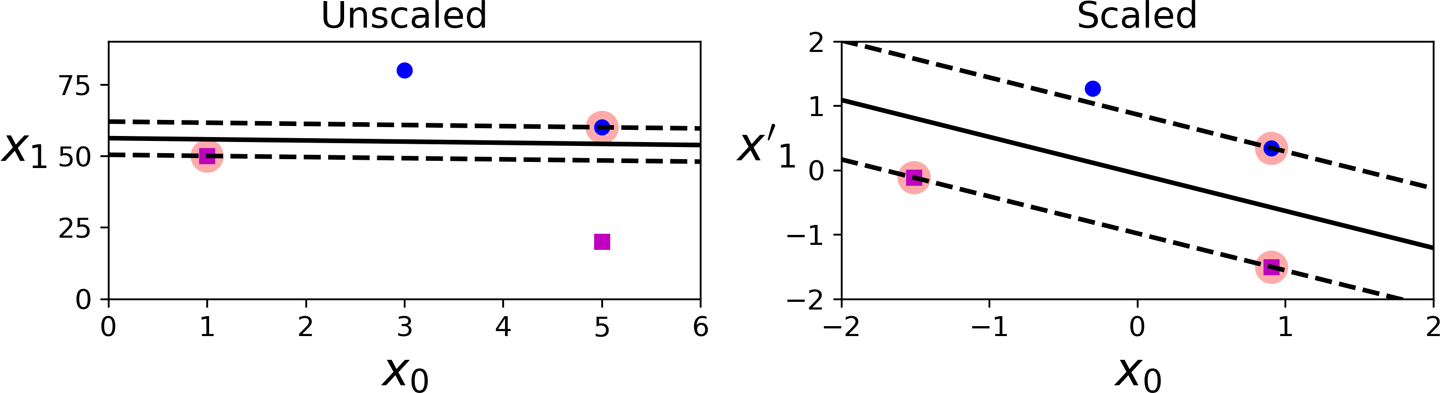

In [10]:
Image(filename='/content/drive/MyDrive/Images-Slides-2024/SVM.png', width=900,height=900)

#### Example to compare the performance of svm for scaled and unscaled data

 We'll generate a small dataset, split it into training and testing sets, and then train and evaluate an SVM with and without feature scaling. We'll use Python and `scikit-learn` for this purpose.

##### Libraries

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score



##### Generating data and Scale one feature to be much larger than the other

In [110]:
# Generate a dataset with two features
X, y = make_classification(n_samples=2000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42, class_sep=0.5)
X[:, 1] *= 100

##### Visualize the dataset

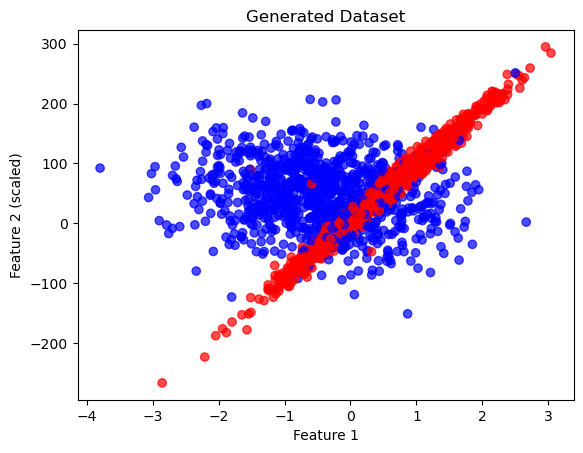

In [111]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2 (scaled)')
plt.title('Generated Dataset')
plt.show()

##### Split the Data

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

##### Train and Evaluate SVM without Scaling

In [113]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)


y_pred_test = svm.predict(X_test)


print("Accuracy without scaling (test):", accuracy_score(y_test, y_pred_test))

Accuracy without scaling (test): 0.785


In [115]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm_scaled = SVC(kernel='linear')
svm_scaled.fit(X_train_scaled, y_train)


y_pred_test_scaled = svm_scaled.predict(X_train_scaled)
print("Accuracy with scaling (test):", accuracy_score(y_train, y_pred_test_scaled))

Accuracy with scaling (test): 0.8061111111111111


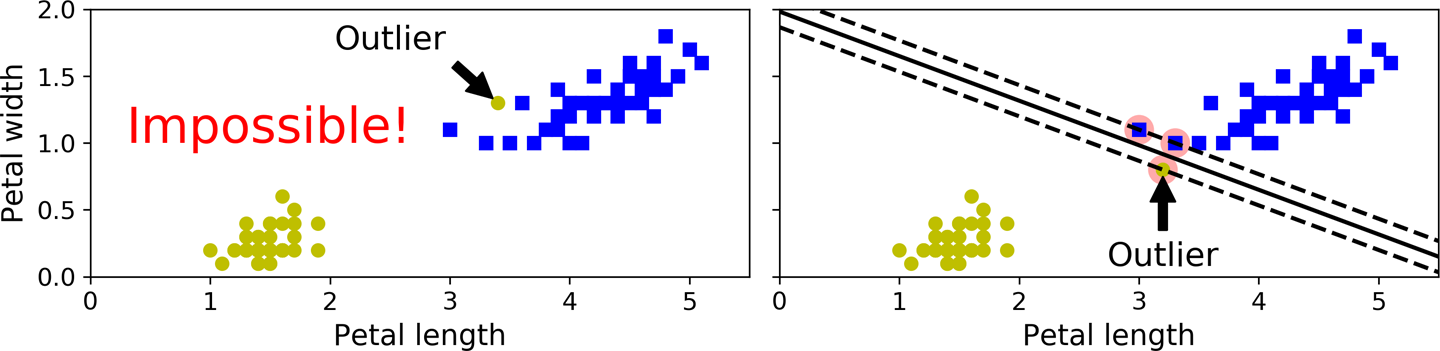

In [11]:
Image(filename='/content/drive/MyDrive/Images-Slides-2024/SVM-1.png', width=900,height=900)

### Soft Margin

Soft Margin tries to balance the trade-off between finding a line that maximizes the margin and minimizes the misclassification. The important idea is to find a good balance between keeping the street as large as possible and limiting the margin violations. This is done using the **C** parameter that we add to the optimization equation that we represented for hard margin.

#### Key Concepts

1. **Objective Function**:
   The objective is to maximize the margin (the distance between the decision boundary and the nearest data points from each class) while allowing some misclassification errors.

   $
   \min_{\mathbf{w}, b, \xi} \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \xi_i
   $

   Where:
   - $\mathbf{w}$ is the weight vector.
   - $b$ is the bias term.
   - $\xi_i \geq 0$ are slack variables representing the degree of misclassification of the $i$-th sample.
   - $C$ is a regularization parameter controlling the trade-off between maximizing the margin and minimizing the classification error.

2. **Constraints**:
   The constraints ensure that the majority of data points are correctly classified, but some are allowed to be within a margin of error.

   $
   y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0, \quad \forall i
   $

   Where:
   - $y_i$ is the class label of the $i$-th sample.
   - $\mathbf{x}_i$ is the feature vector of the $i$-th sample.

### How Soft Margin SVM Works

1. **Slack Variables ($\xi_i$)**:
   Slack variables allow some points to be within the margin or misclassified. A point that lies within the margin but on the correct side has $0 < \xi_i < 1$. A point that is misclassified has $\xi_i > 1$.

2. **Regularization Parameter (C)**:
   The parameter $C$ determines the penalty for misclassification. A large $C$ value tries to classify all training examples correctly, while a small $C$ value allows more misclassifications, leading to a wider margin.

### Dual Form and Lagrangian 

To find the best hyperplane, we introduce Lagrange multipliers $\alpha_i$ for the inequality constraints. The Lagrangian is constructed as follows:

$$
\mathcal{L}(\mathbf{w}, b, \xi, \alpha) = \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n \xi_i - \sum_{i=1}^n \alpha_i [y_i (\mathbf{w} \cdot \mathbf{x}_i + b) - (1 - \xi_i)] - \sum_{i=1}^n \beta_i \xi_i
$$

where $\alpha_i \geq 0$ and $\beta_i \geq 0$ are the Lagrange multipliers.

To convert the primal problem to the dual problem, we take the partial derivatives of the Lagrangian with respect to $\mathbf{w}$, $b$, and $\xi_i$, and set them to zero:

$
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} = \mathbf{w} - \sum_{i=1}^n \alpha_i y_i \mathbf{x}_i = 0 \implies \mathbf{w} = \sum_{i=1}^n \alpha_i y_i \mathbf{x}_i
$

$
\frac{\partial \mathcal{L}}{\partial b} = \sum_{i=1}^n \alpha_i y_i = 0
$

$
\frac{\partial \mathcal{L}}{\partial \xi_i} = C - \alpha_i - \beta_i = 0 \implies 0 \leq \alpha_i \leq C
$

Substituting these into the Lagrangian, we obtain the dual form:

#### Dual Form


$$
\max_{\alpha} \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j (\mathbf{x}_i \cdot \mathbf{x}_j)
$$

subject to:

$
0 \leq \alpha_i \leq C \quad \text{and} \quad \sum_{i=1}^n \alpha_i y_i = 0
$

### Kernel Trick

For non-linear data, we use the kernel trick. Instead of computing the dot product $(\mathbf{x}_i \cdot \mathbf{x}_j)$ directly, we use a kernel function $K(\mathbf{x}_i, \mathbf{x}_j)$ that implicitly maps the input features to a higher-dimensional space.


#### Nonlinear SVM Classification
#### Although linear SVM classifiers are efficient and work  well in many cases, many datasets are not even close to being linearly separable. One approach to handling nonlinear datasets is to add more features, such as polynomial features. In some cases, this can result in a linearly separable dataset. Consider the left plot: it represents a simple dataset with just one feature, ${x_1}$.This dataset is not linearly separable. But if you add a second feature  ${x_2} = {({x_1})^2}$ , the resulting 2D dataset is perfectly linearly separable.

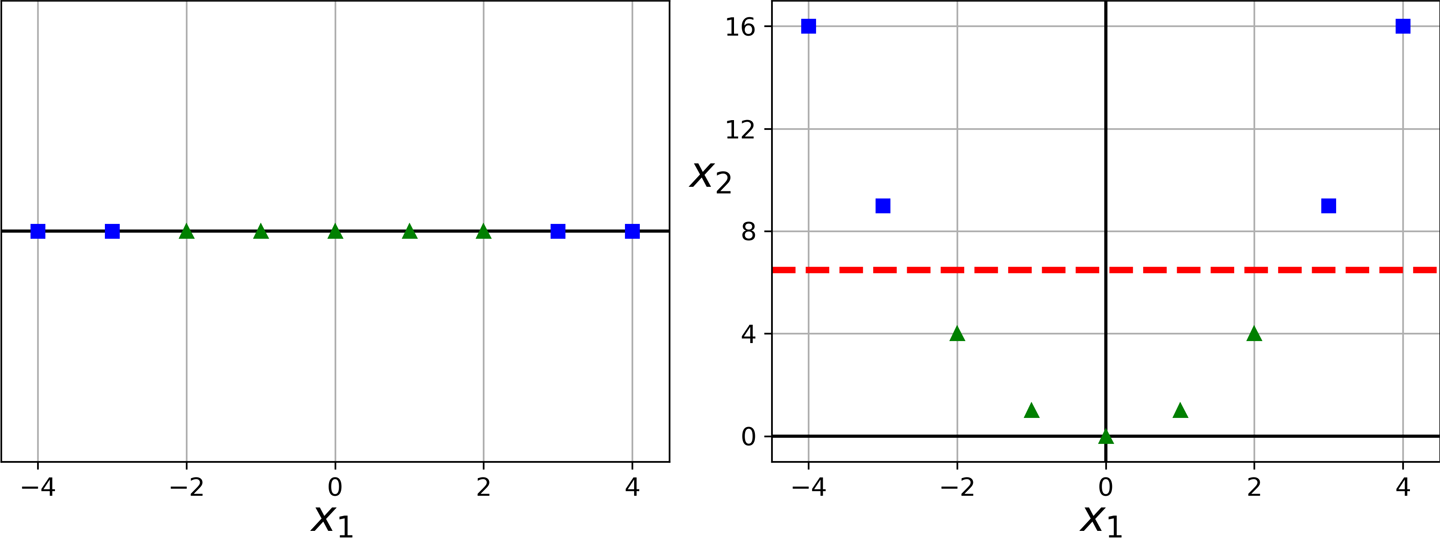

In [13]:
Image(filename='/content/drive/MyDrive/Images-Slides-2024/SVM-3.png', width=900,height=900)

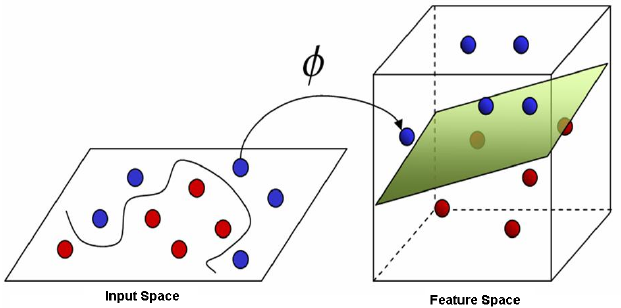

In [32]:
Image(filename= r'images\addfeature.png', width=900,height=900)

#### RBF example 

#### What is RBF kernel?
RBF kernels are the most generalized form of kernelization and is one of the most widely used kernels due to its similarity to the Gaussian distribution

The RBF kernel function for two points X₁ and X₂ computes the similarity or how close they are to each other. This kernel can be mathematically represented as follows:

$ K(\mathbf{x}, \mathbf{y}) = \exp\left(-\frac{\|\mathbf{x} - \mathbf{y}\|^2}{2\sigma^2}\right) $

Here:
- $\mathbf{x}$ and $\mathbf{y}$ are two data points in the feature space.
- $\|\mathbf{x} - \mathbf{y}\|^2$ is the squared Euclidean distance between $\mathbf{x}$ and $\mathbf{y}$.
- $\sigma$ is a parameter that defines the width of the Gaussian function, controlling the degree of influence of each training example. It is often expressed as $\gamma = \frac{1}{2\sigma^2}$.





RBF kernel projects vectors into an infinite dimensional space. For Euclidean vectors, this space is an infinite dimensional Euclidean space.

ψRBF : $ R^n → R^∞ $


For the RBF kernel:

$
K(\mathbf{x}_i, \mathbf{x}_j) = \exp \left( -\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2 \right)
$

The dual problem with kernel becomes:

$$
\max_{\alpha} \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j K(\mathbf{x}_i, \mathbf{x}_j)
$$

subject to the same constraints.

**Decision Function**

After solving the dual problem and finding the optimal $\alpha_i$, the decision function for a new input $\mathbf{z}$ is:

$$
f(\mathbf{z}) = \sum_{i=1}^n \alpha_i y_i K(\mathbf{x}_i, \mathbf{z}) + b
$$

**The sign of $f(\mathbf{z})$ determines the class label.**

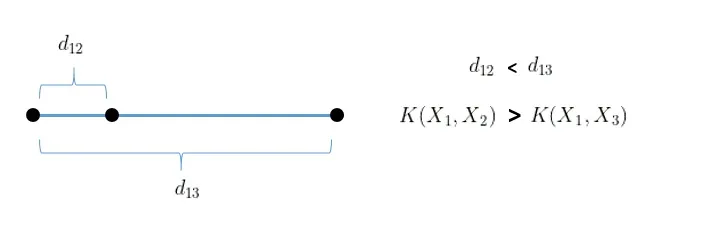

In [117]:
Image(filename= r'images\kerneldistance.png', width=900,height=900)

The $\gamma$ parameter

Recall a kernel expresses a measure of similarity between vectors. The RBF kernel represents this similarity as a decaying function of the distance between the vectors (i.e.the squared-norm of their distance). That is, if the two vectors are close together then, $\|\mathbf{x} - \mathbf{y}\|$ will be small. Then, so long as $\gamma$ > 0, it follows that $-\gamma\|\mathbf{x} - \mathbf{y}\|$  will be larger.Thus, closer vectors have a larger RBF kernel value than farther vectors. 

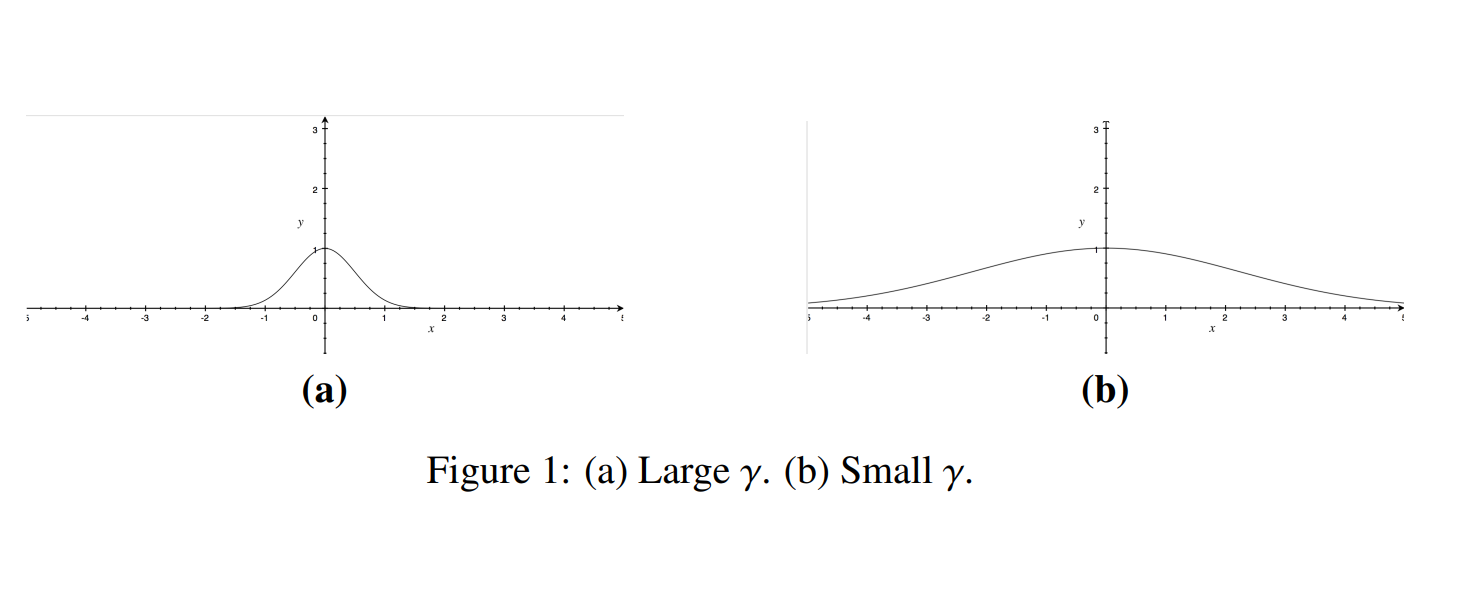

In [118]:
Image(filename= r'images\gammaeffect.png', width=900,height=900)

#### Example of RBF kernel

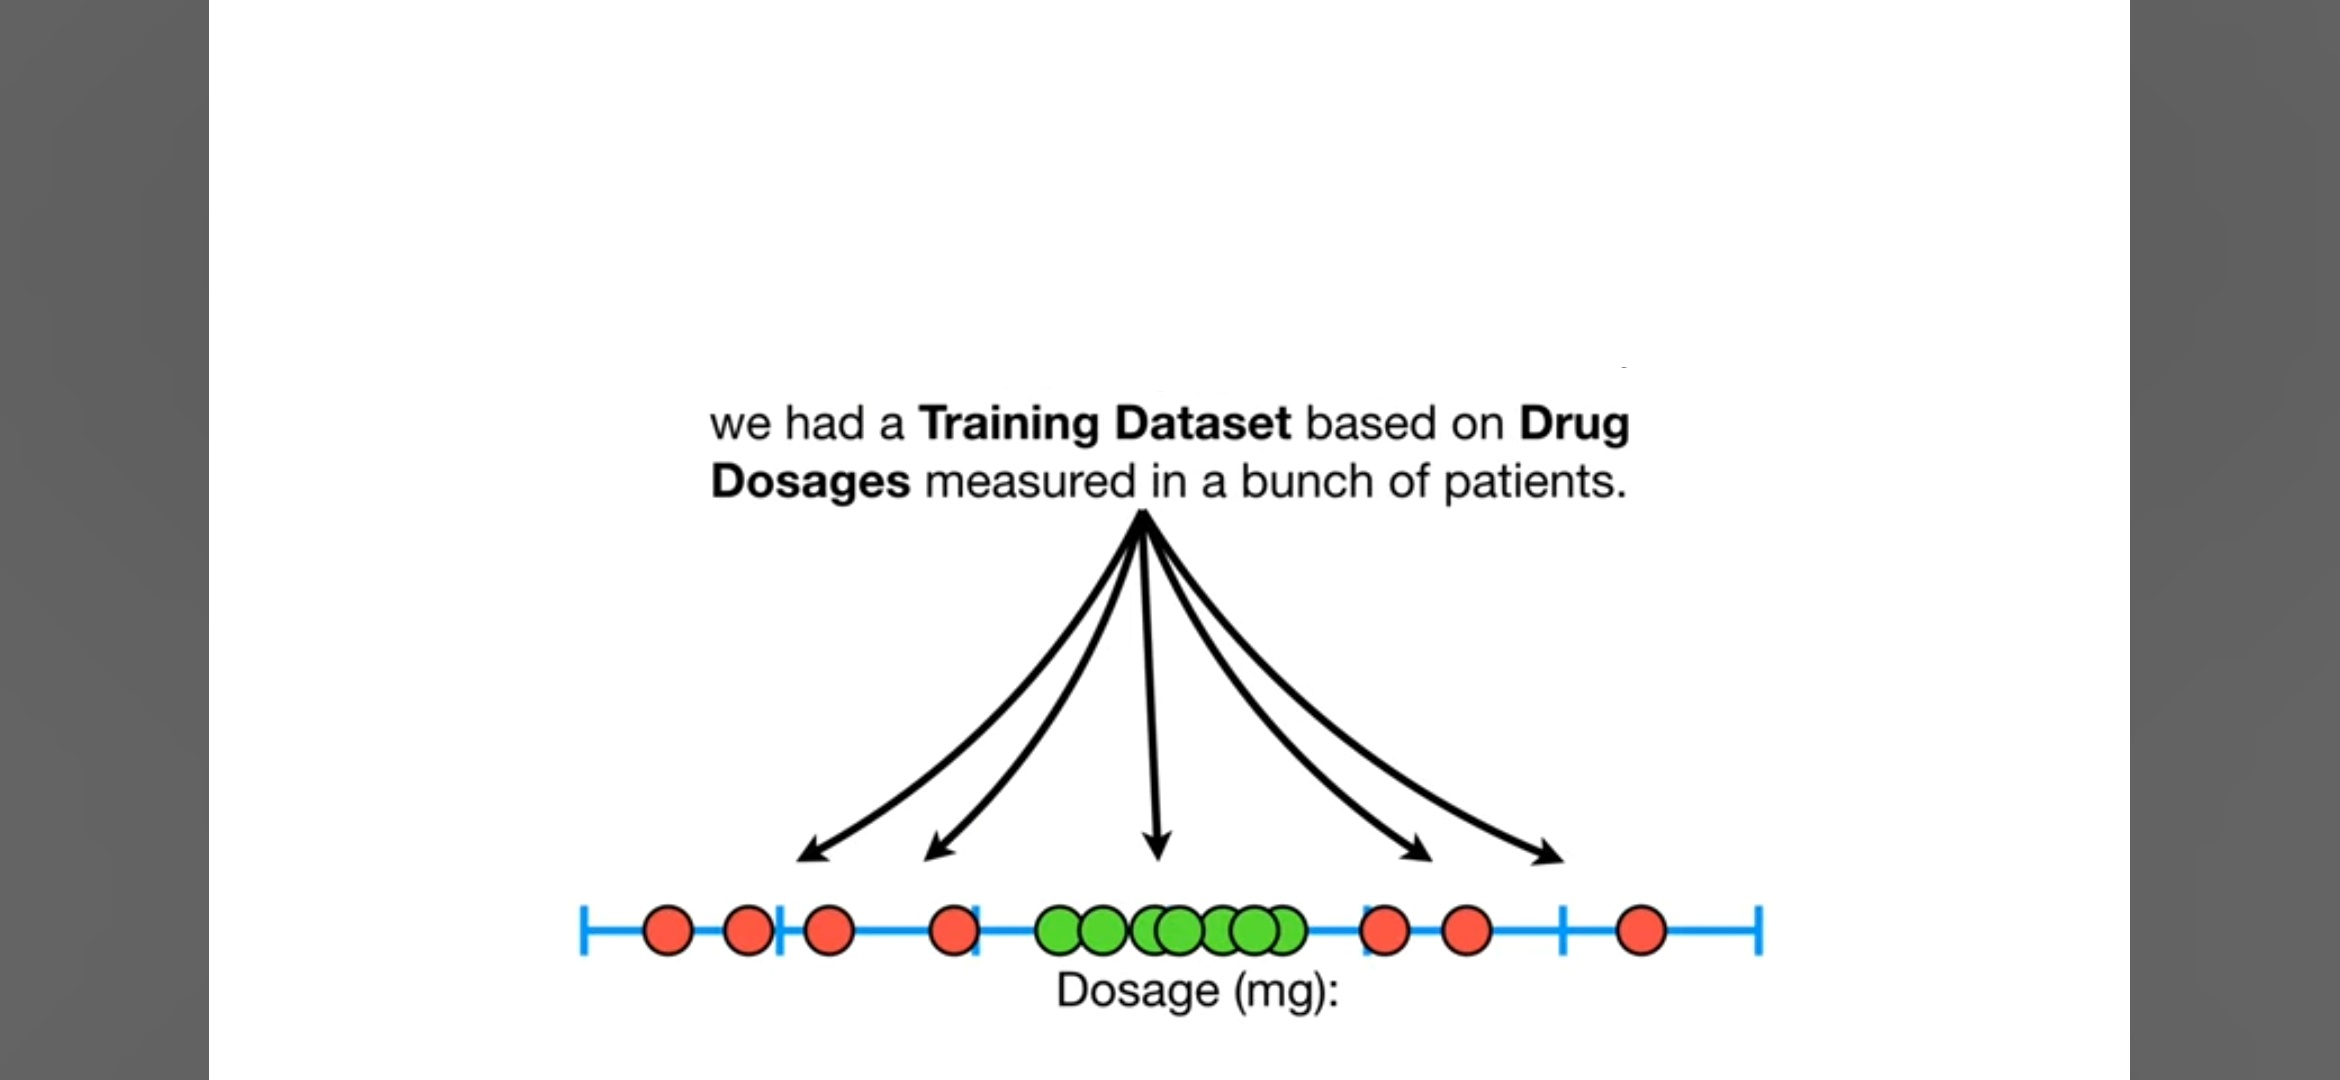

In [121]:
Image(filename= r'images\rbf1.jpg', width=600,height=600)

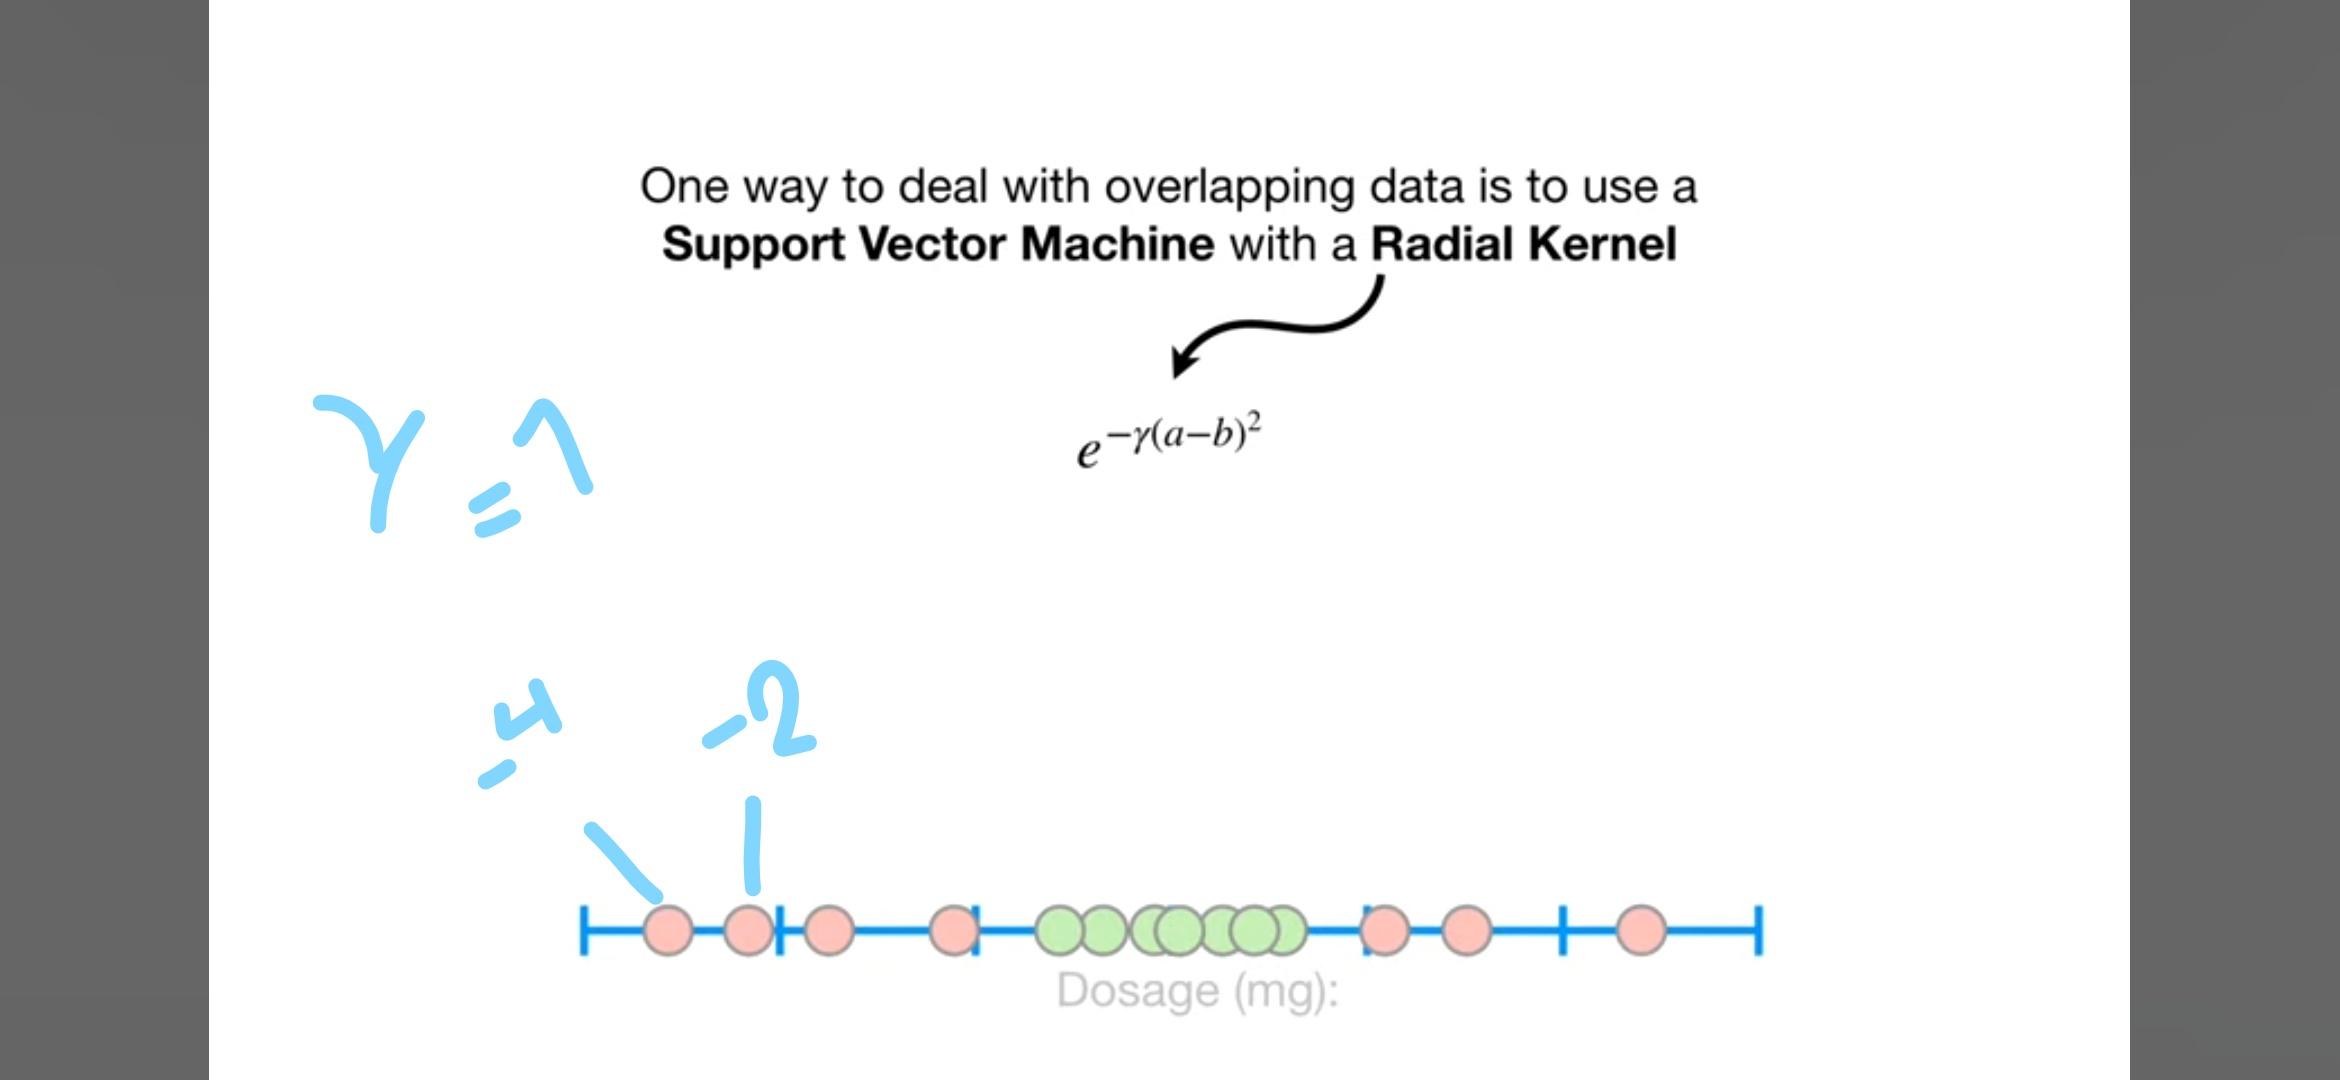

In [122]:
Image(filename= r'images\rbf2.jpg', width=600,height=600)

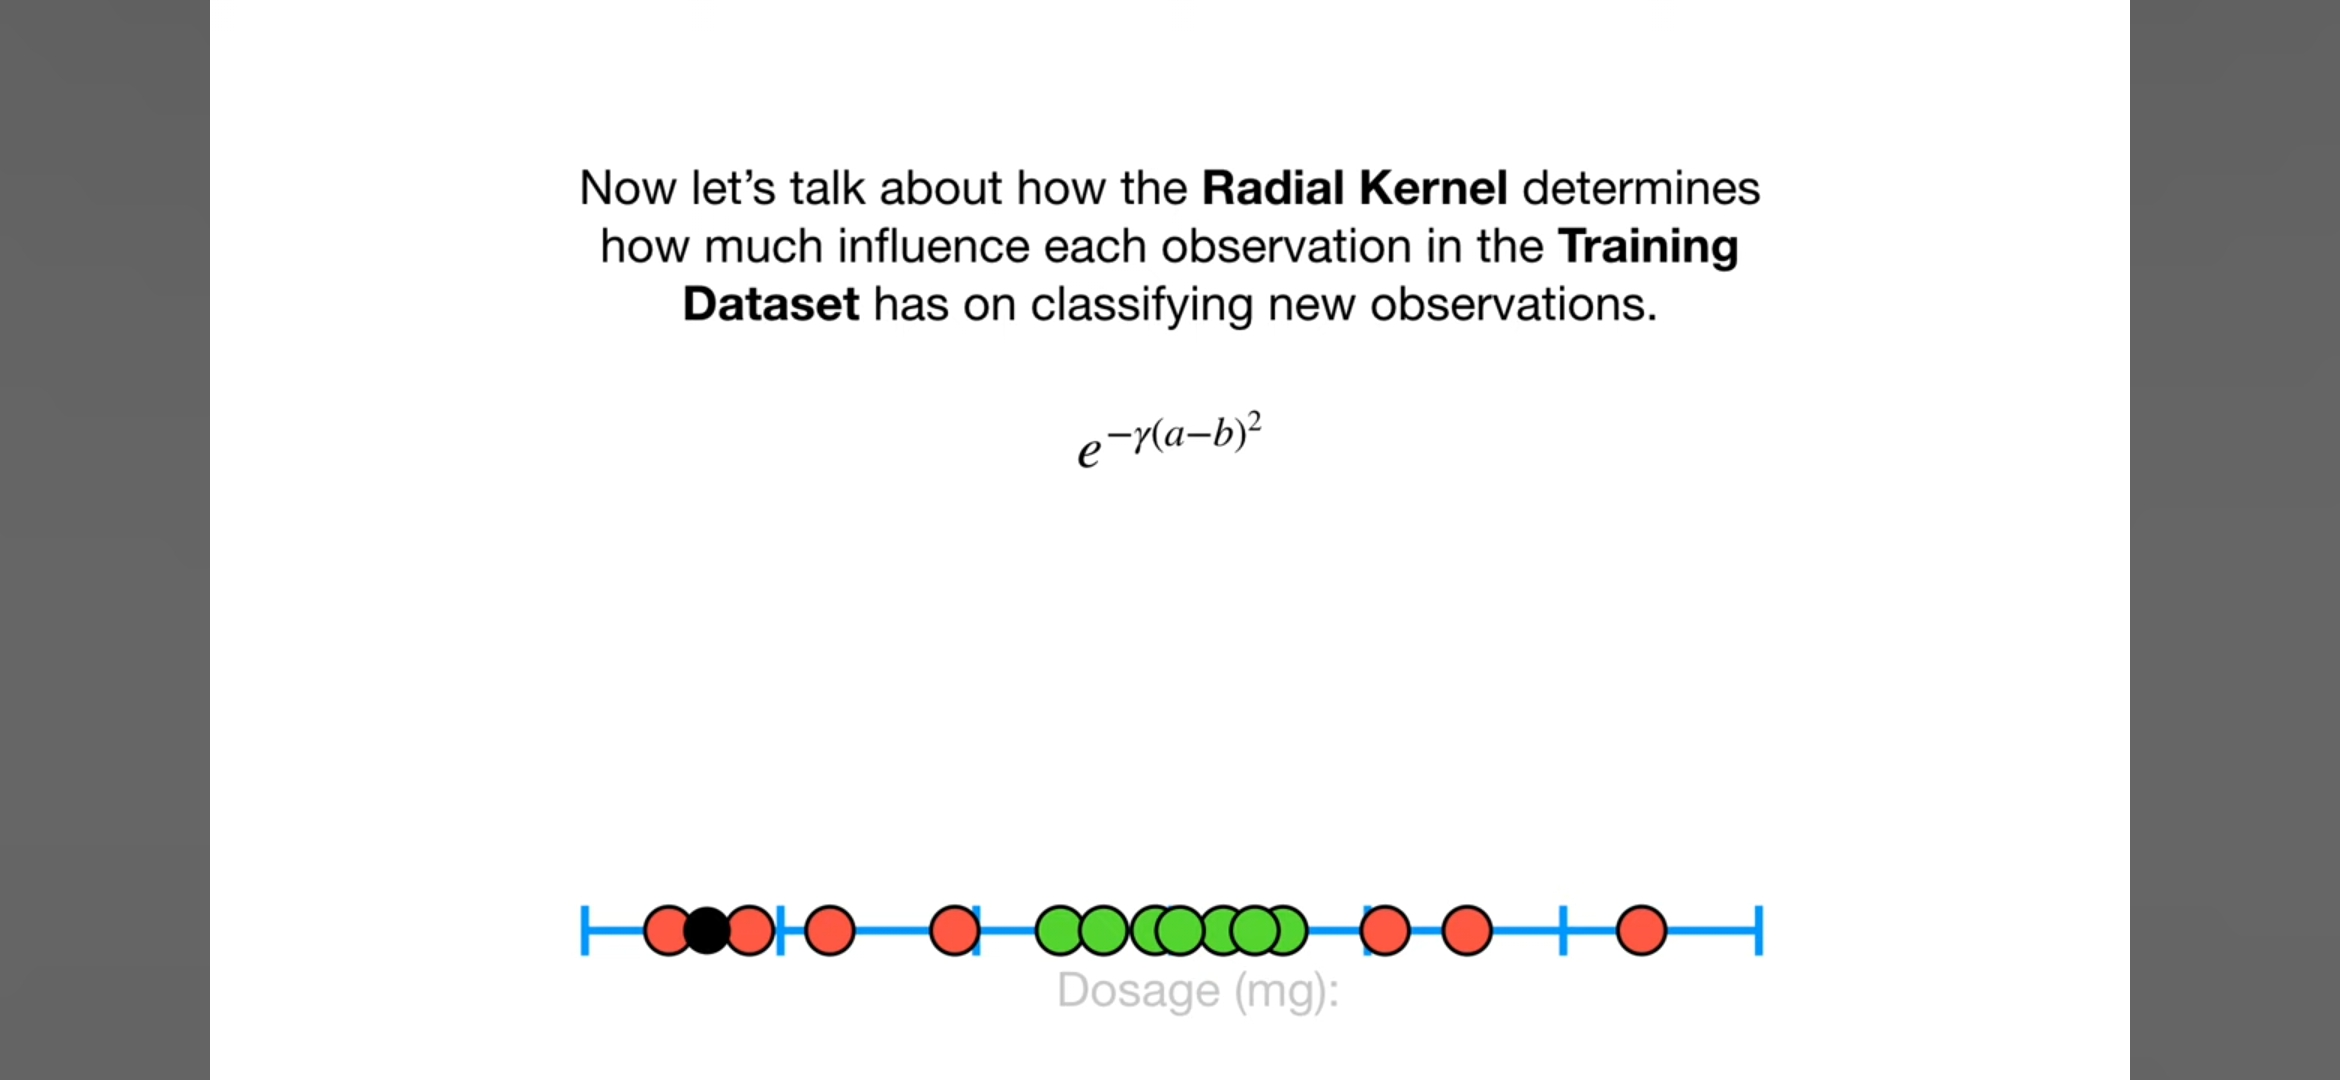

In [123]:
Image(filename= r'images\rbf3.jpg', width=600,height=600)

Let's calculate the influence of two pairs of points in both of them assume $\gamma = 1$:


**First Example**

1. **Define the points:**
    - x = -2 
    - y = -4 

2. **Calculate the squared Euclidean distance between $ x $ and $ y $:**
   $ \|x - y\|^2 = (-2 - (-4))^2 = (-2 + 4)^2 = 2^2 = 4 $

3. **Apply the RBF kernel formula:**
   $ K(x, y) = \exp(-\gamma \|x - y\|^2) $

   Given $\gamma = 1$:
   $ K(x, y) = \exp(-1 \cdot 4) = \exp(-4) $

4. **Compute the value:**
   $ K(x, y) = \exp(-4) \approx 0.0183 $

Therefore, the RBF kernel $ K(x, y) $ for the given points is 0.0183.

**Second Example**


1. **Define the points:**
   x = -4 
   y = 4

2. **Calculate the squared Euclidean distance between x and  y :**
   $ \|x - y\|^2 = (-4 - 4)^2 = (-8)^2 = 64 $

3. **Apply the RBF kernel formula:**
   $ K(x, y) = \exp(-\gamma \|x - y\|^2) $

   $ K(x, y) = \exp(-1 \cdot 64) = \exp(-64) $

4. **Compute the value:**
   $ K(x, y) = \exp(-64) \approx 1.125 \times 10^{-28} \approx 0.000000$

Therefore, the RBF kernel K(x, y) for x = -4 and y = 4 has no influence to eachother.

### Imapct on Decision Tree 

Points with higher similarity (closer in space) have a stronger influence on each other's classification. This similarity affects the hyperplane, making it more flexible enough to capture complex patterns in the data.  

### 1. **SVM Optimization Problem**

The SVM optimization problem aims to find the optimal hyperplane that maximizes the margin between two classes. For a non-linear SVM using the RBF kernel, the problem is transformed using the kernel trick.

#### Primal Form of SVM

We already disscused about this equation and its goal:

$
\min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n \xi_i
$

subject to:

$
y_i (\mathbf{w} \cdot \phi(\mathbf{x}_i) + b) \geq 1 - \xi_i \quad \text{and} \quad \xi_i \geq 0
$


#### Dual Form of SVM

By converting the primal problem to its dual form, we get:

$
\max_{\alpha} \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j K(\mathbf{x}_i, \mathbf{x}_j)
$

subject to:

$
0 \leq \alpha_i \leq C \quad \text{and} \quad \sum_{i=1}^n \alpha_i y_i = 0
$

where:
- $\alpha_i$ are the Lagrange multipliers.
- $K(\mathbf{x}_i, \mathbf{x}_j)$ is the kernel function.

### 2. **RBF Kernel Function**

The RBF kernel function is defined as:

$
K(\mathbf{x}_i, \mathbf{x}_j) = \exp \left( -\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2 \right)
$

where $\gamma$ is a parameter that defines the influence range of a single training example.

### 3. **Effect of the RBF Kernel on the Decision Boundary**

The kernel function $K(\mathbf{x}_i, \mathbf{x}_j)$ computes the similarity between points $\mathbf{x}_i$ and $\mathbf{x}_j$. This similarity influences the SVM's decision boundary in the following ways:

#### Step-by-Step Explanation:

1. **Computing Kernel Values:**
   - Calculate the kernel values between all pairs of training points using the RBF kernel function.
   - These values determine the similarity between points. Closer points (in terms of Euclidean distance) have higher kernel values.

2. **Dual Optimization Problem:**
   - Use the kernel values in the dual optimization problem to solve for the Lagrange multipliers $\alpha_i$.
   - Points with higher similarity (higher kernel values) will have more influence on the solution.

3. **Support Vectors:**
   - The support vectors are the points for which $0 < \alpha_i < C$. These points lie closest to the decision boundary.
   - The kernel values ensure that the influence of these support vectors extends to other points in the dataset.

4. **Decision Function:**
   - The decision function of the SVM is given by:

   $
   f(\mathbf{x}) = \sum_{i=1}^n \alpha_i y_i K(\mathbf{x}_i, \mathbf{x}) + b
   $

   - Here, the kernel values $K(\mathbf{x}_i, \mathbf{x})$ determine the influence of each support vector on the classification of a new point $\mathbf{x}$.

5. **Constructing the Decision Boundary:**
   - The decision boundary is defined by the set of points where $f(\mathbf{x}) = 0$.
   - The RBF kernel transforms the input space into a higher-dimensional space where a linear separation is possible. The shape of the decision boundary in the original space is non-linear.


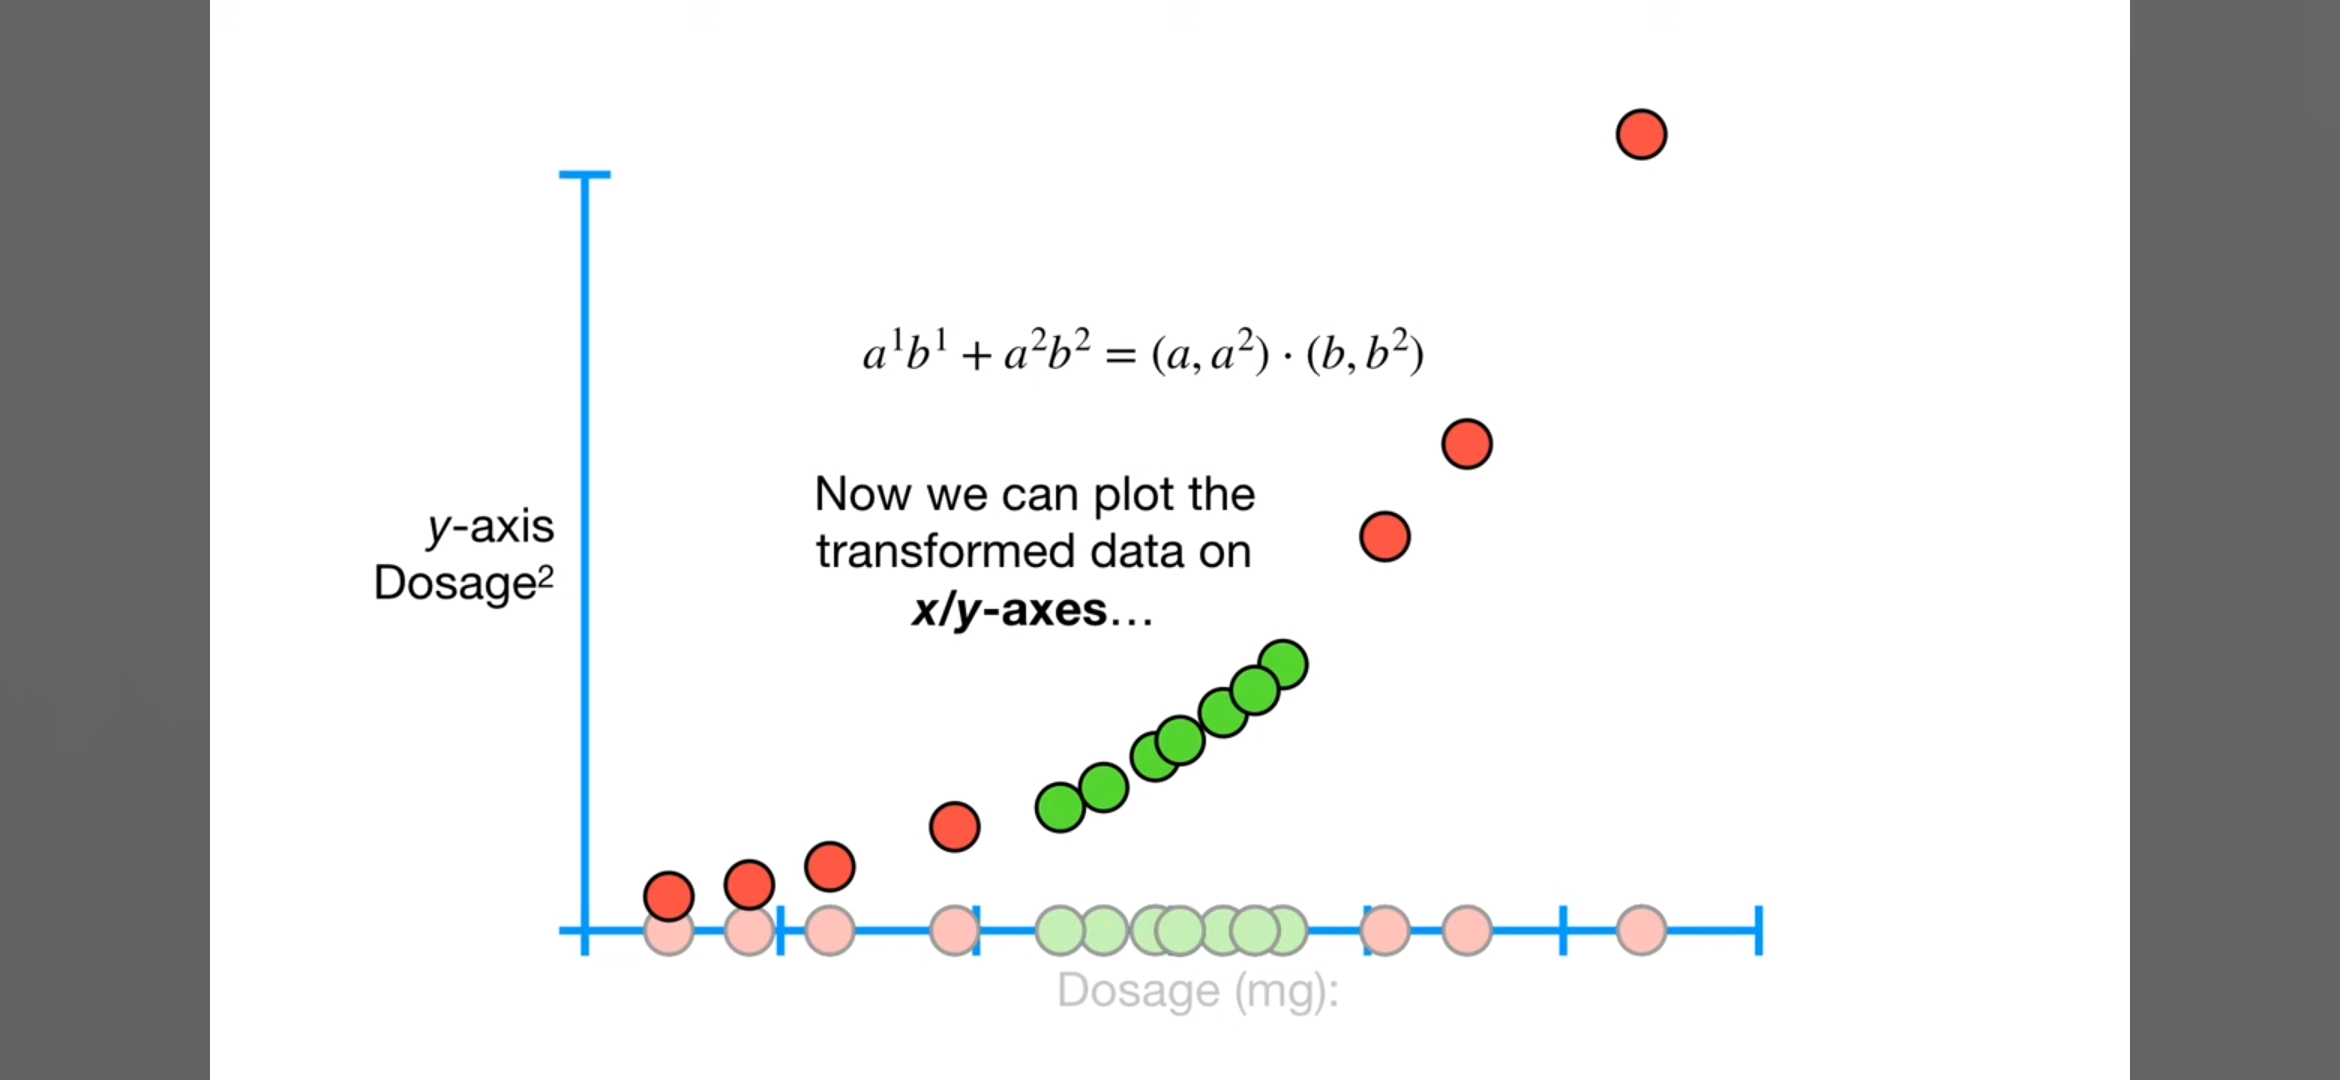

In [124]:
Image(filename= r'images\rbf4.jpg', width=600,height=600)

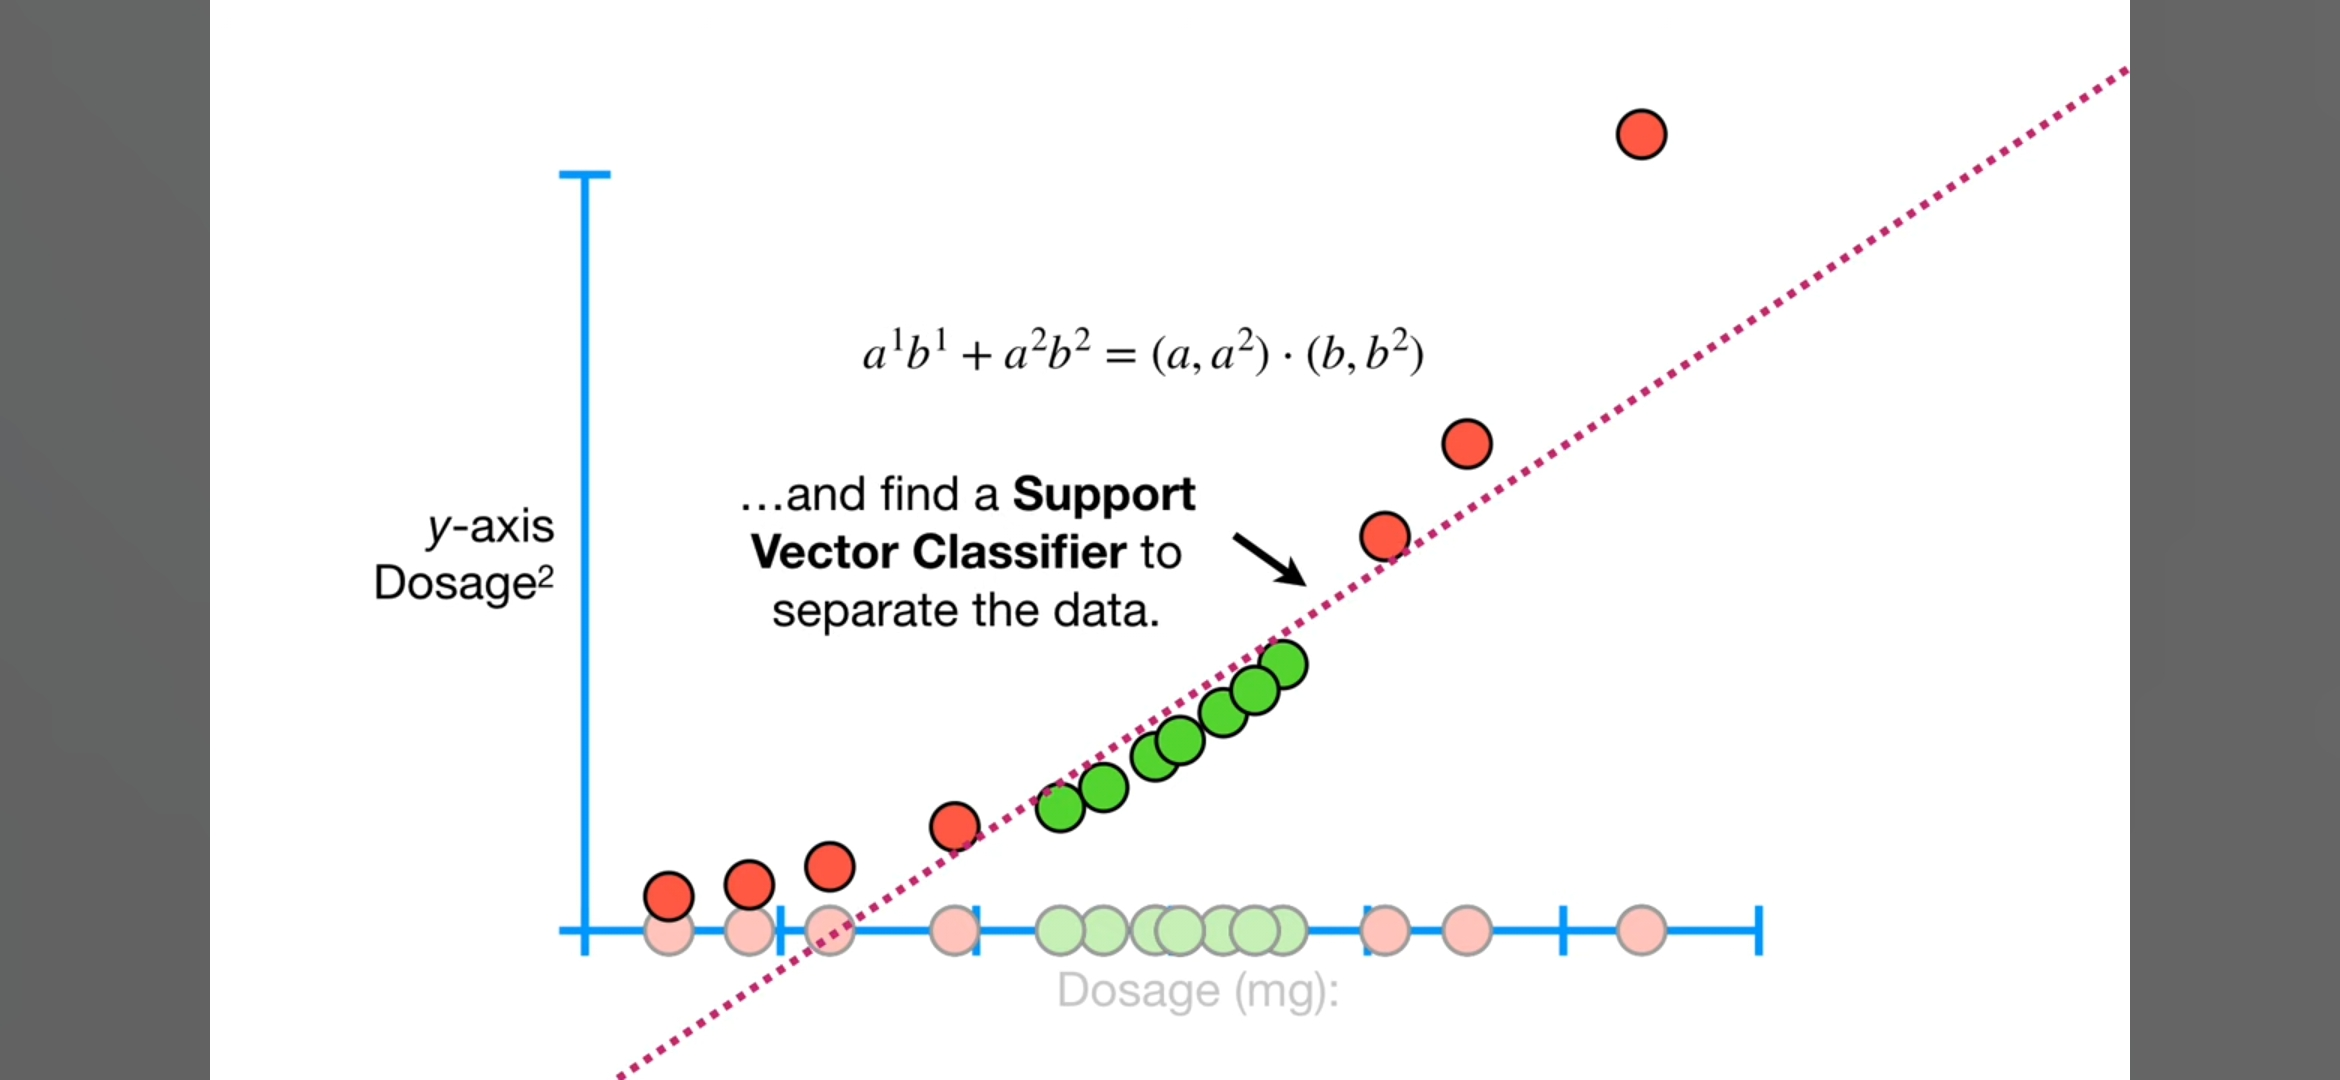

In [125]:
Image(filename= r'images\rbf5.jpg', width=600,height=600)

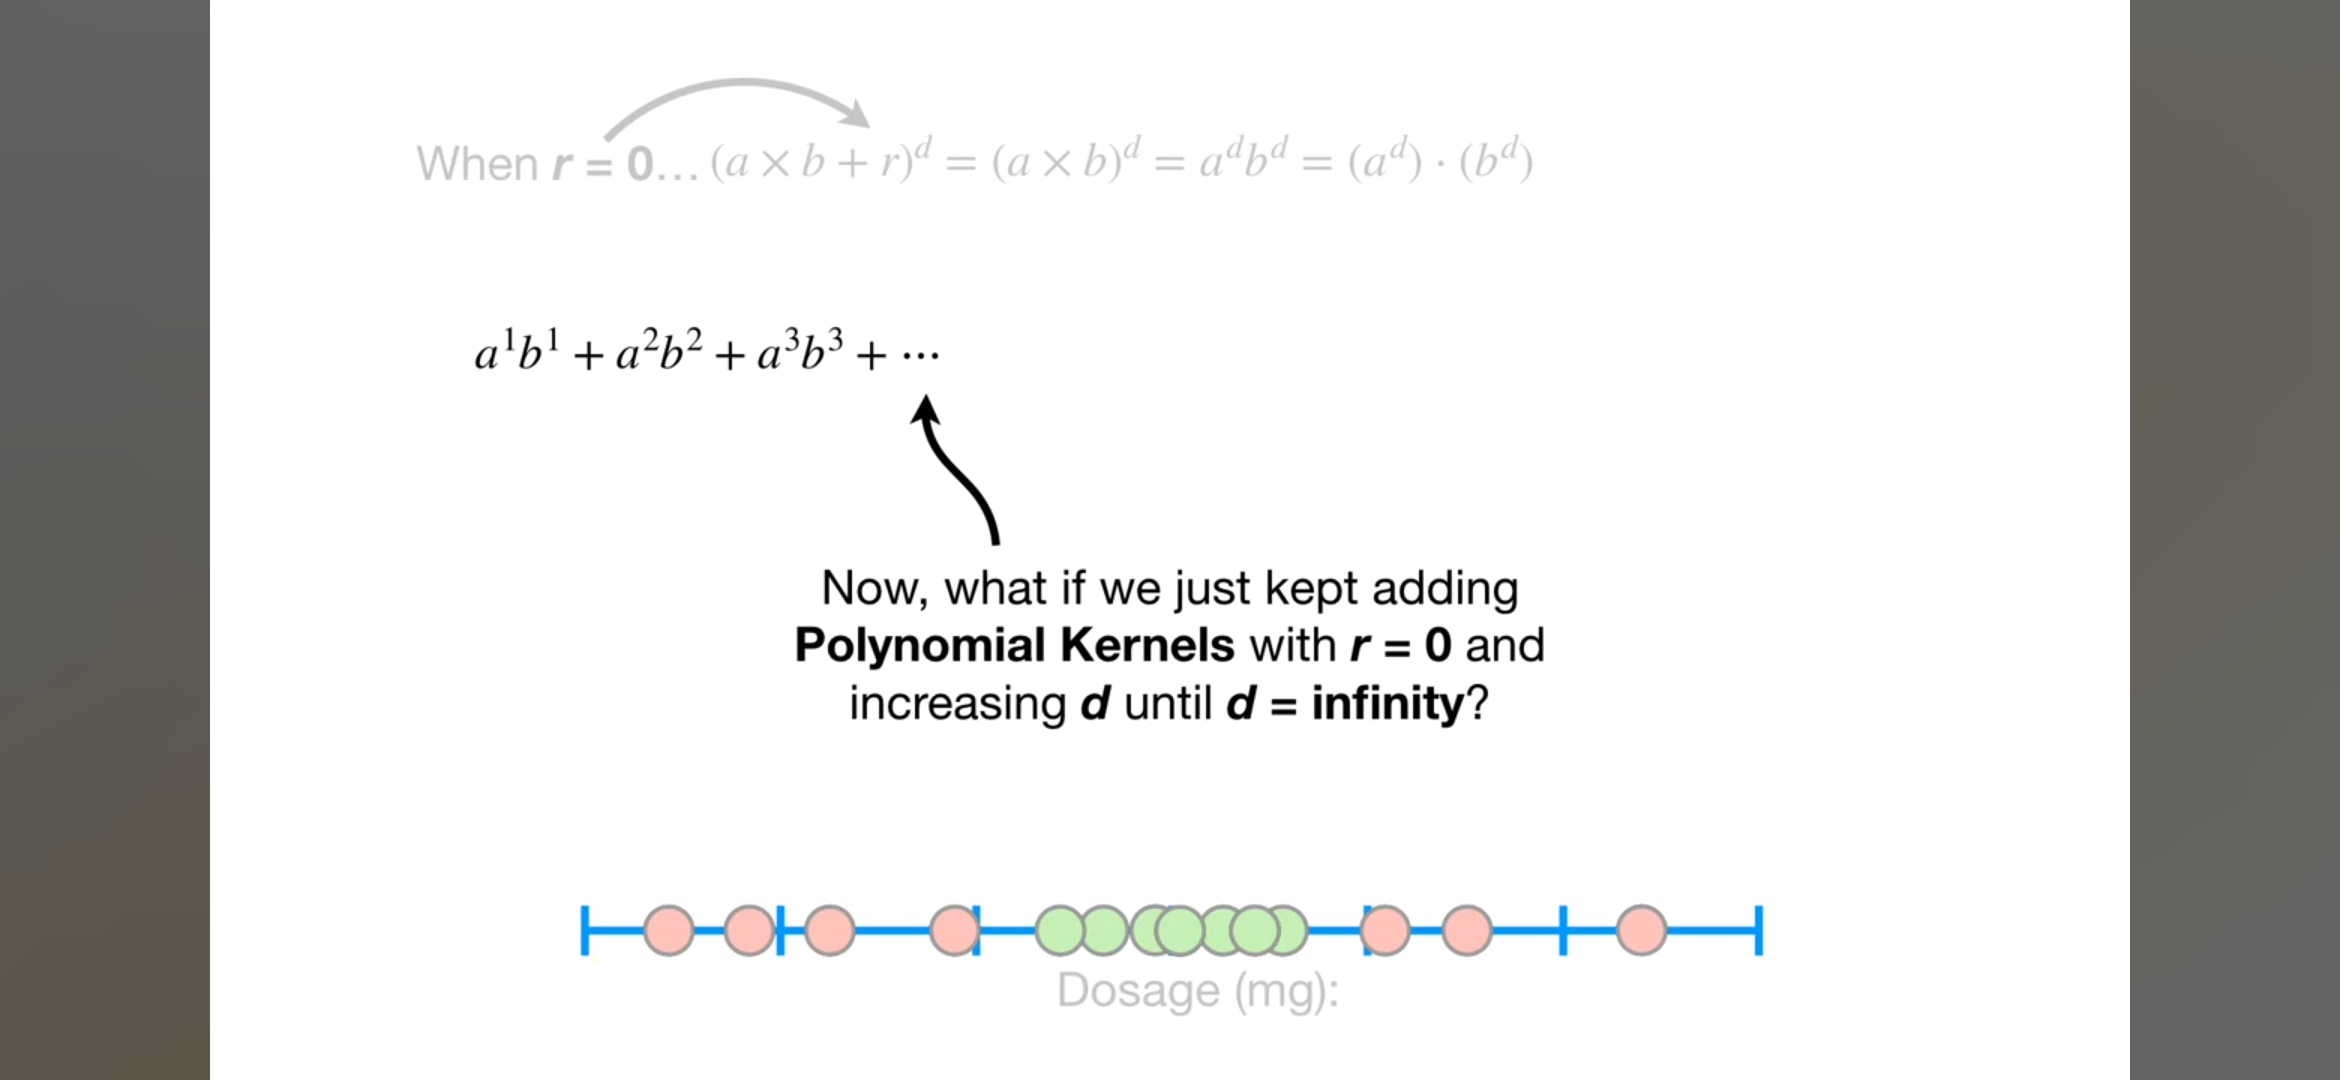

In [126]:
Image(filename= r'images\rbf6.jpg', width=600,height=600)

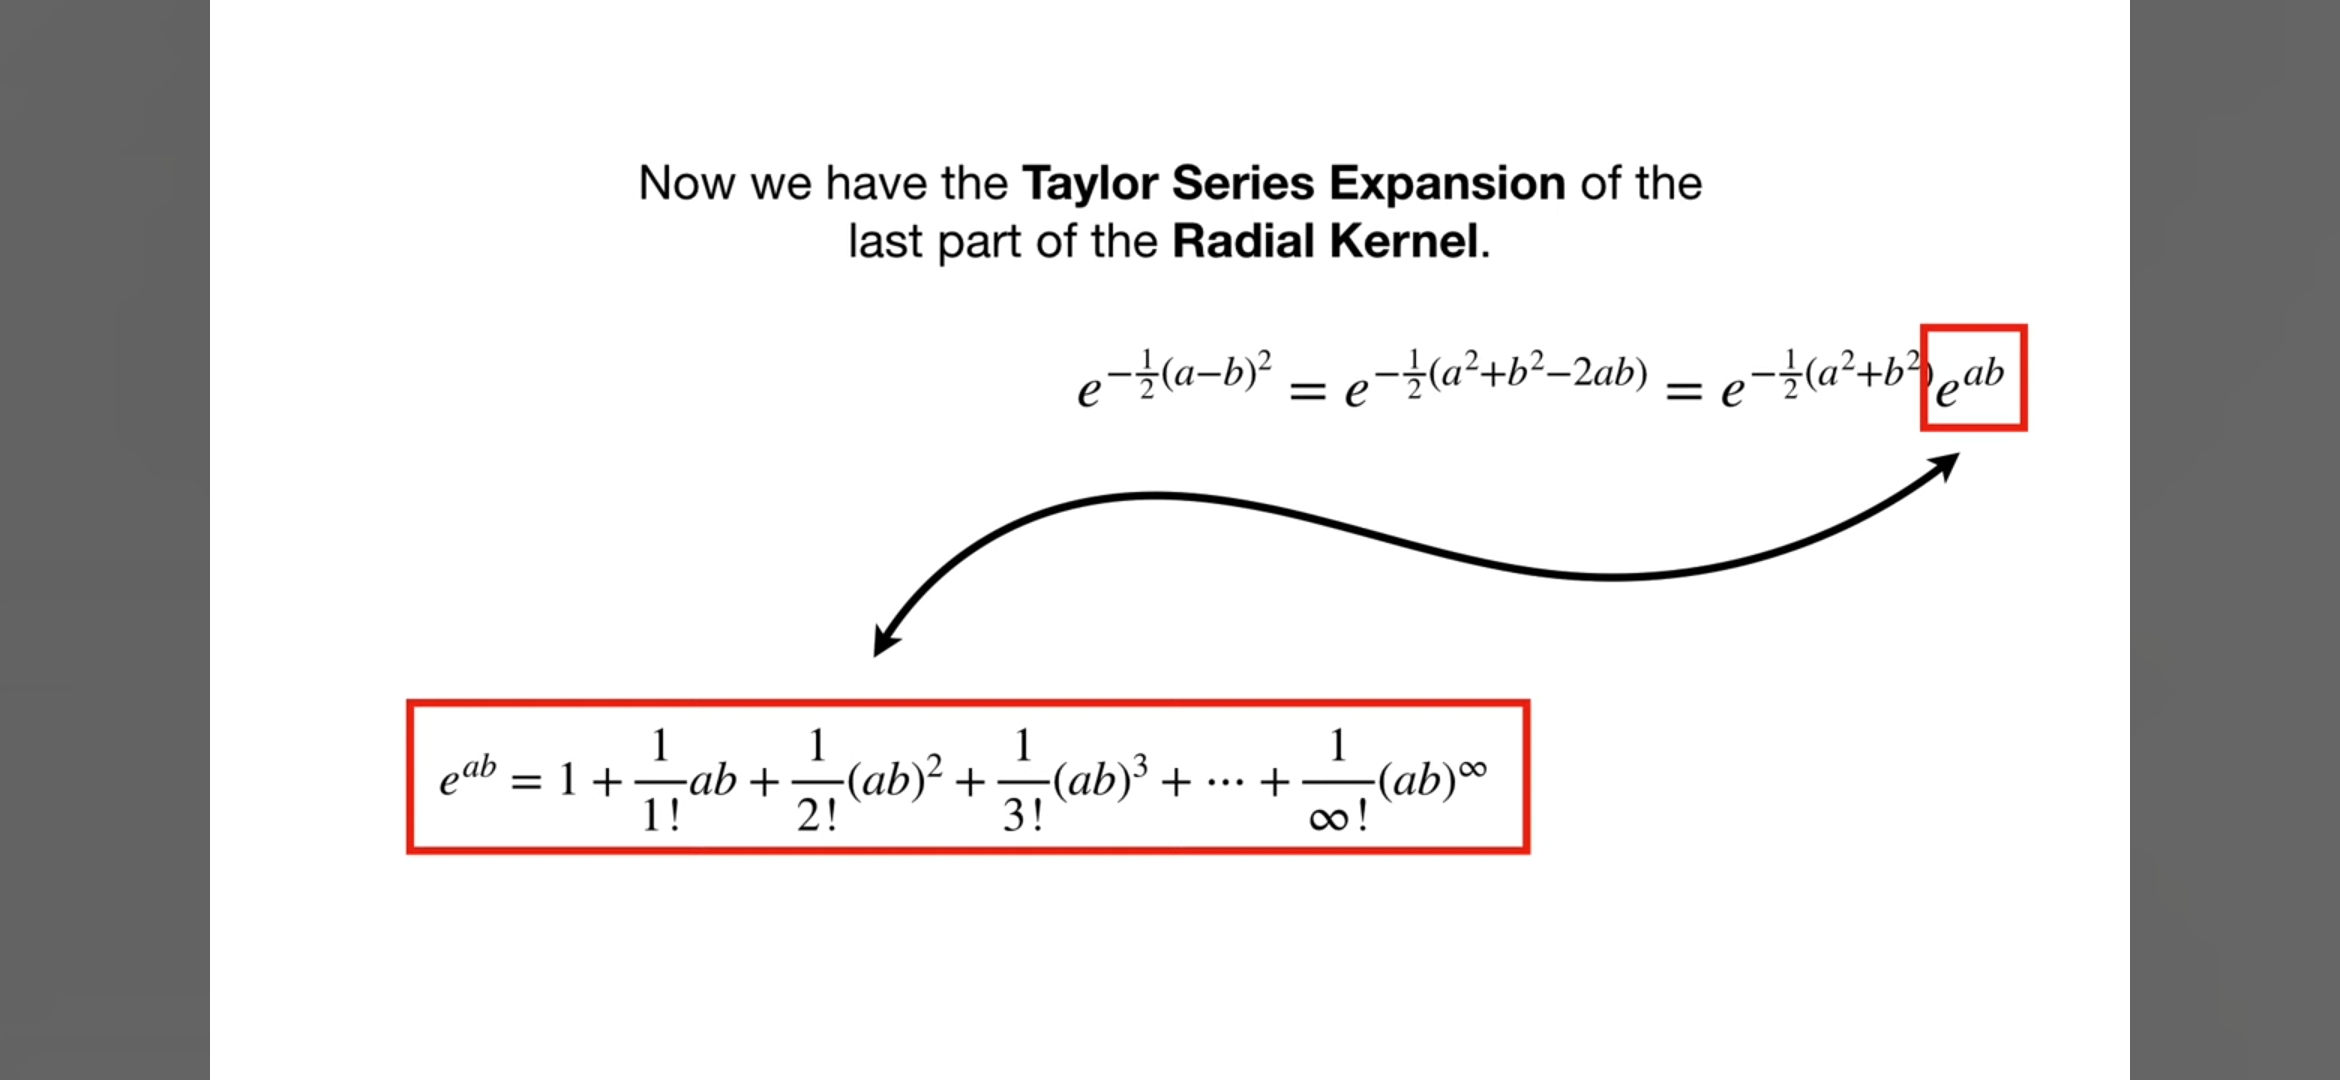

In [127]:
Image(filename= r'images\rbf7.jpg', width=600,height=600)

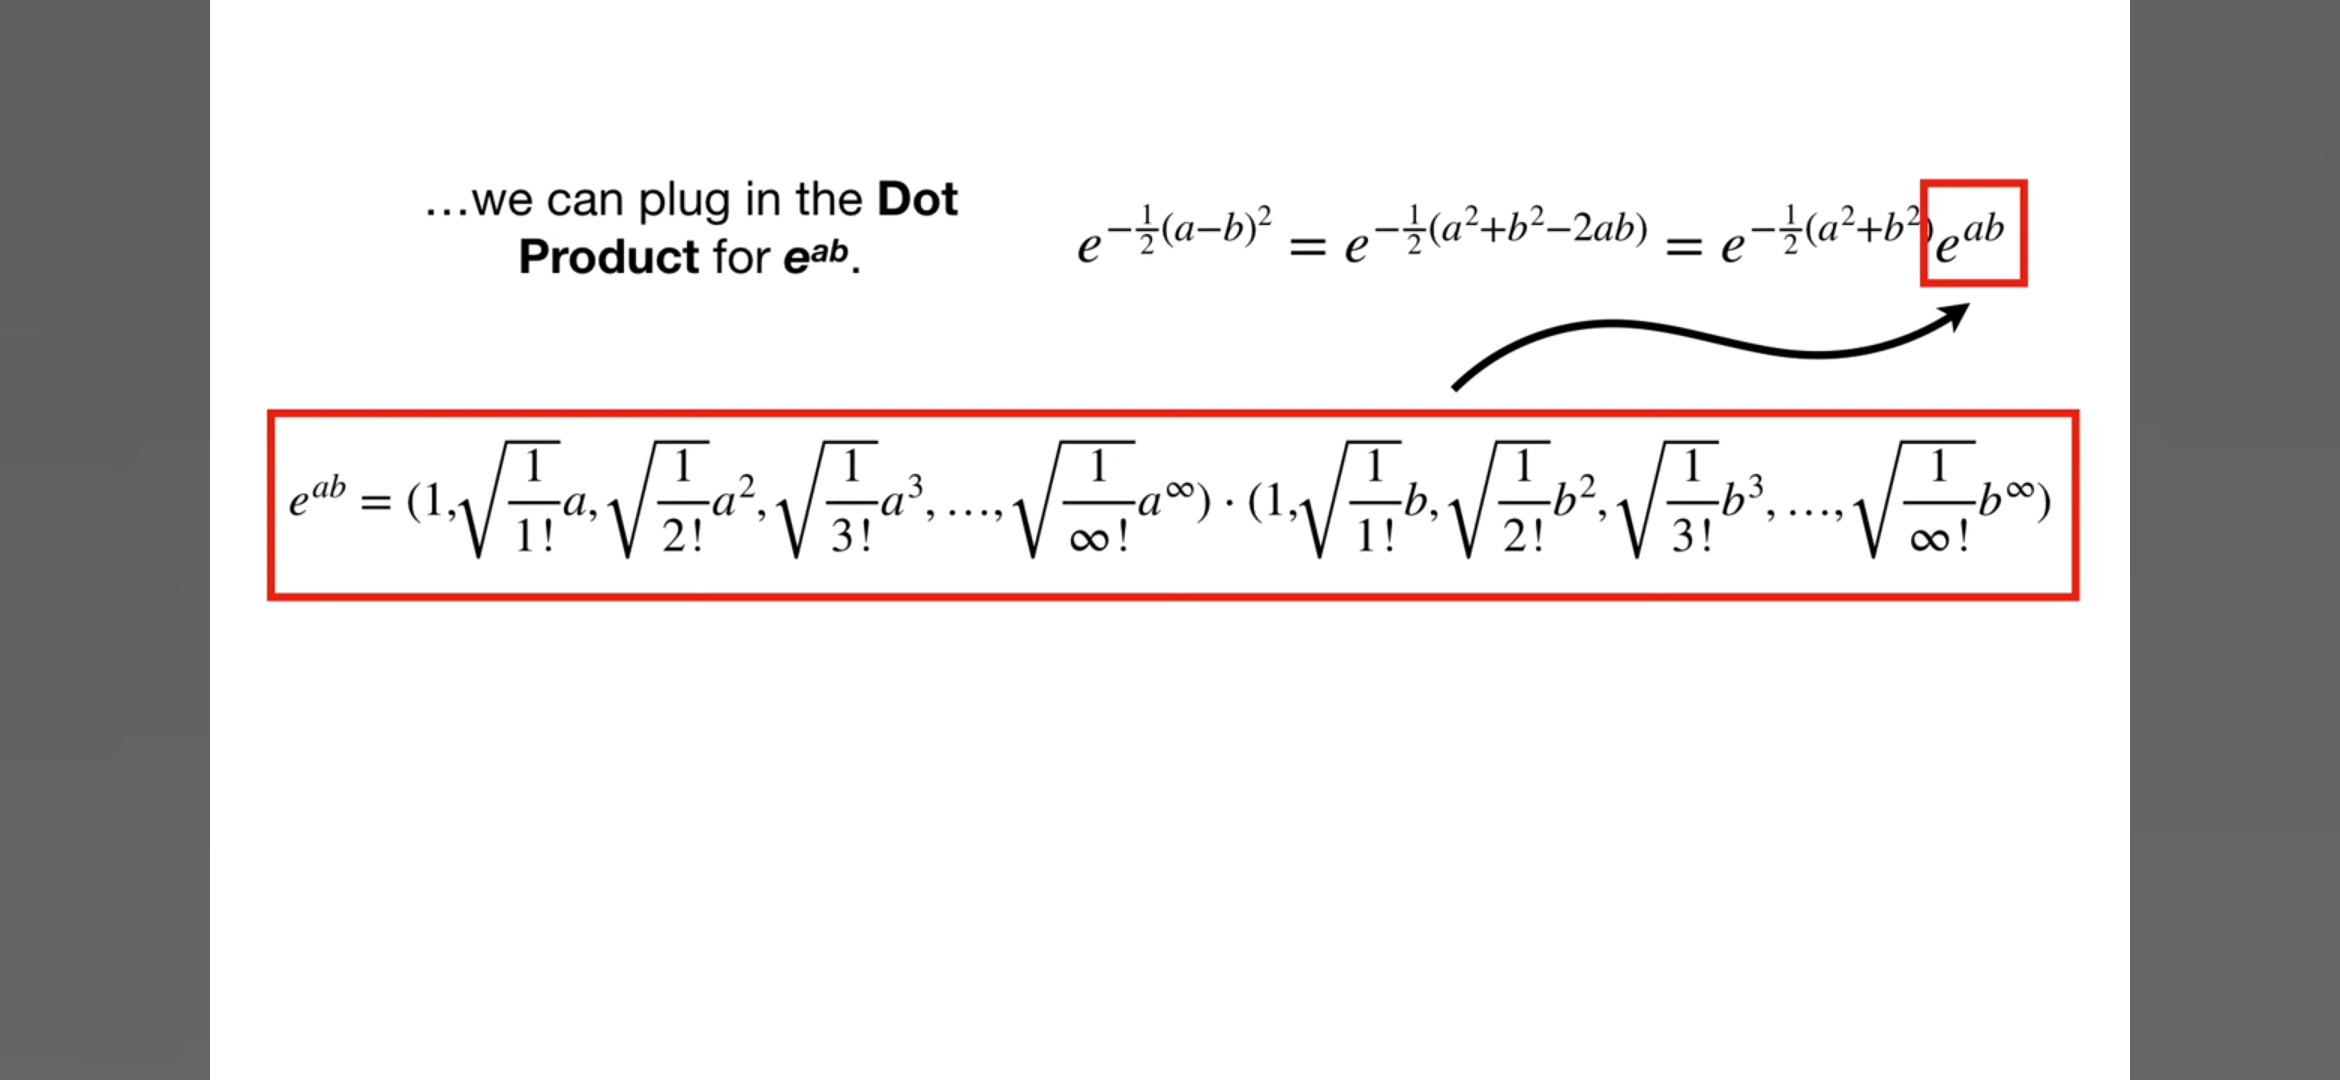

In [128]:
Image(filename= r'images\rbf8.jpg', width=600,height=600)

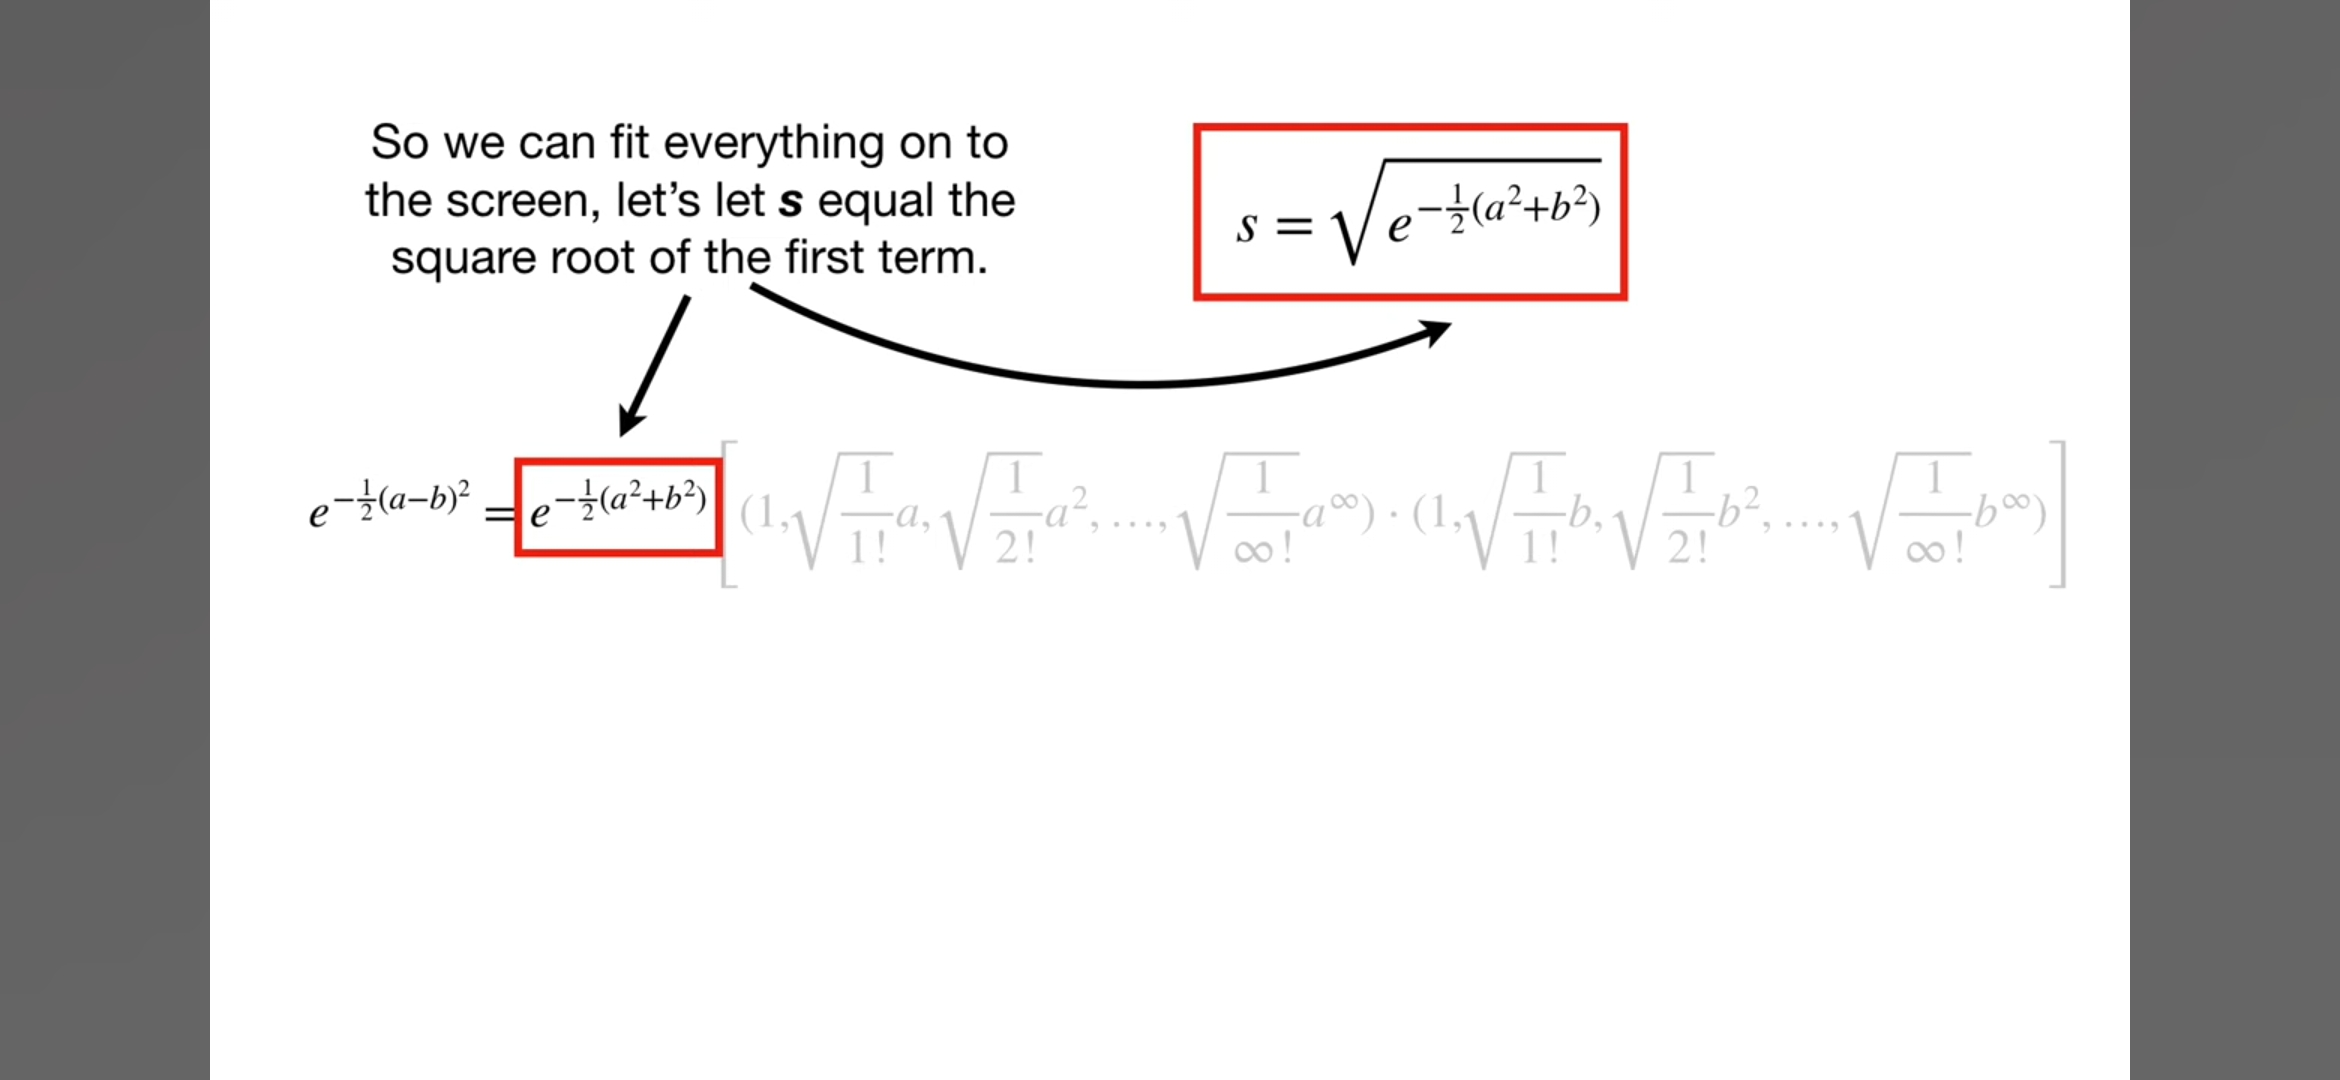

In [129]:
Image(filename= r'images\rbf9.jpg', width=600,height=600)

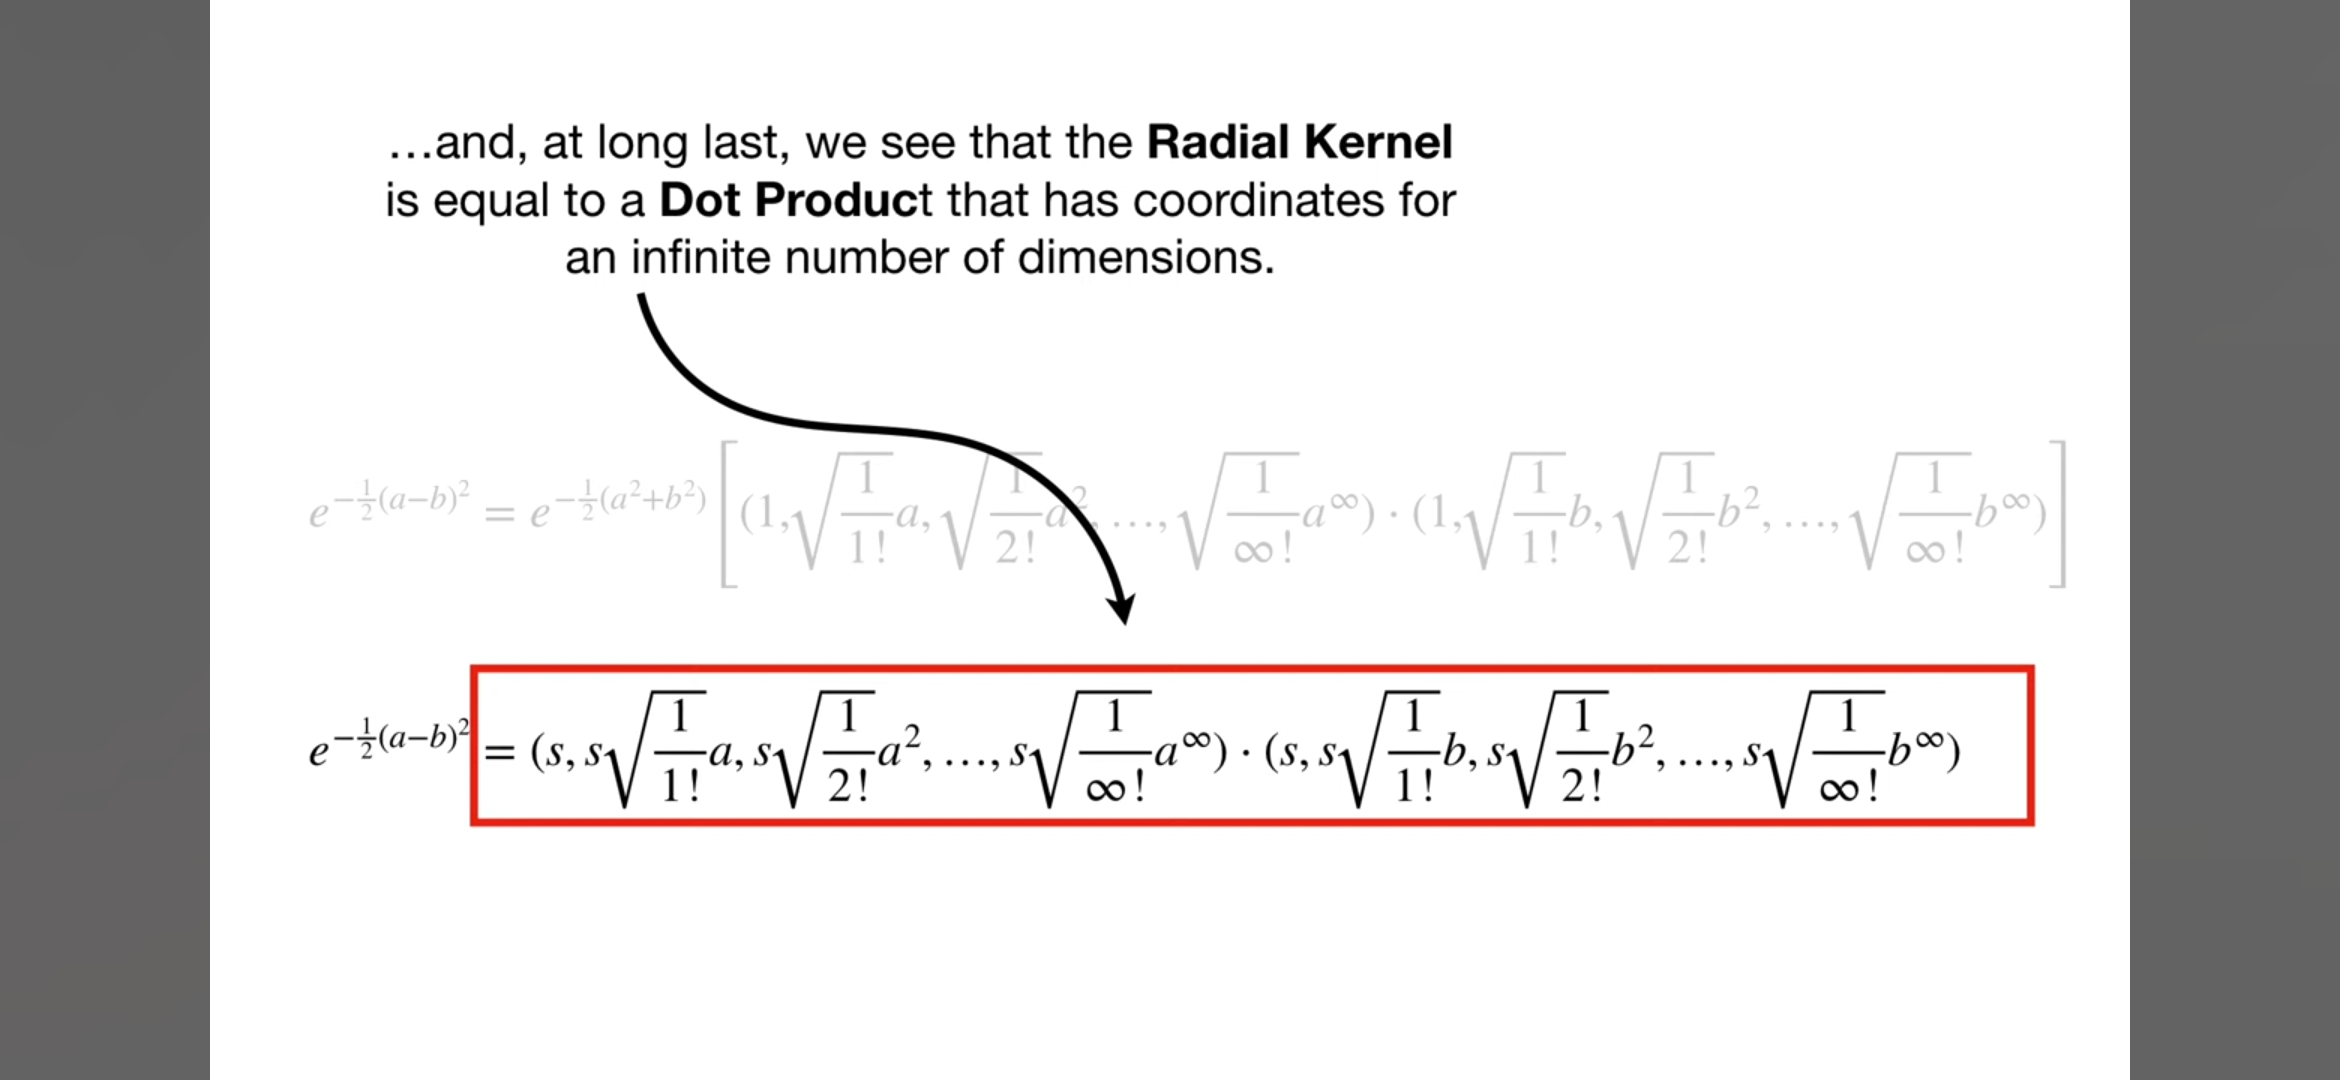

In [130]:
Image(filename= r'images\rbf10.jpg', width=600,height=600)

#### 5
The SVM classifier can output the distance between the test instance and the decision boundary. We can use this as a confidence score. However, this score cannot be directly converted into an estimation of the class probability. If you set probability=True when creating an SVM in Scikit-Learn, then after training, it will calibrate the probabilities using Logistic Regression on the SVM’s scores (trained by an additional five-fold cross-validation on the training data). This will add the predict_proba() and predict_log_proba() methods to the SVM.

#**Model 1**

#**1.Import libraries.**

In [5]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


#**2. We load our data.**

In [6]:
dataset = load_iris()
data = dataset.data
target = dataset.target


#**3. We perform preprocessing on our data.**

In [30]:
sc = StandardScaler()
sc.fit_transform(data)


array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

#**4. We do train test split.**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, test_size=0.15)

#**5. We train our model.**

In [32]:
model = SVC()
model.fit(X_train,y_train)


SVC()

#**6. We compute the accuracy score on our test data.**

In [33]:
accuracy_score(y_test, model.predict(X_test))

1.0

#**Model 2**

#**1.Import libraries.**

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


#**2. We load our data.**

In [36]:
titanic = pd.read_csv('/content/drive/MyDrive/Final-Dataset-Ready-N/final_dataset_ready.csv')
dataset = titanic.copy()
X = np.asarray(dataset.drop('Survived', axis=1))
y = np.asarray(dataset['Survived'])
y[y==0] = -1
X.shape
y[0:10]


array([-1,  1,  1,  1, -1, -1, -1, -1,  1,  1])

#**3. We do train test split.**

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape
print(X_test.shape,y_test.shape)


(179, 9) (179,)


#**4. We perform preprocessing on our data.**

In [38]:
sc = StandardScaler()
X_train_normalized = sc.fit_transform(X_train)
X_test_normalized = sc.transform(X_test)


#**5. We train our model.**

In [39]:
svmModel = SVC(kernel = 'rbf',C=2,gamma = 0.9)
svmModel.fit(X_train_normalized,y_train)


SVC(C=2, gamma=0.9)

#**6. We use our model to predict our test data.**

In [40]:
Y_pred = svmModel.predict(X_test_normalized)
print(round(accuracy_score(y_test, Y_pred)*100,2))


80.45



## **Part III**

### **The Gradient-Boosting Algorithm**

### **Gradient-Boosted Tree (GBT) is another tree-based ensemble algorithm similar to Random Forest. GBTs use a technique known as boosting to create a strong learner from weak learners (shallow trees). GBTs train an ensemble of decision trees sequentially, with each succeeding tree decreasing the error of the previous tree. This is done by using the residuals of the previous model to fit the next model. This residual-correction process is performed a set number of iterations with the number of iterations determined by cross-validation until the residuals have been fully minimized.**








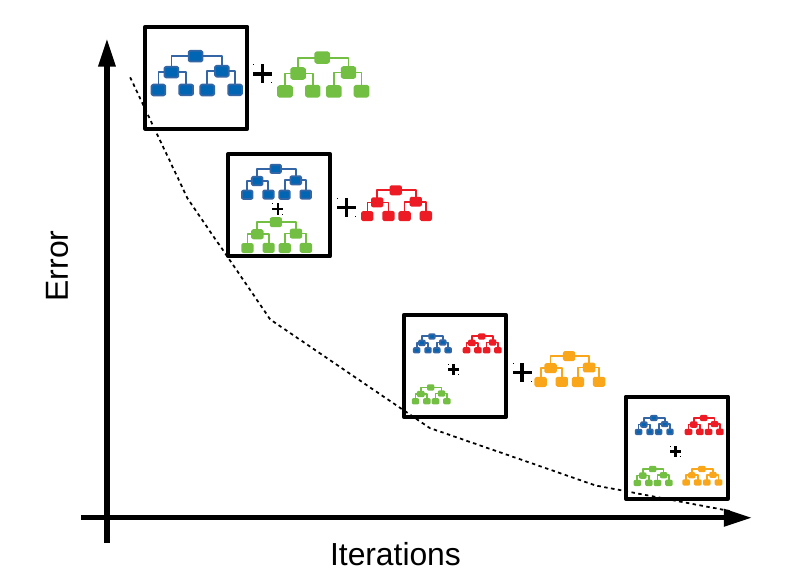

In [2]:
from IPython.display import Image
Image(filename='images/gbt.png', width=900,height=900)

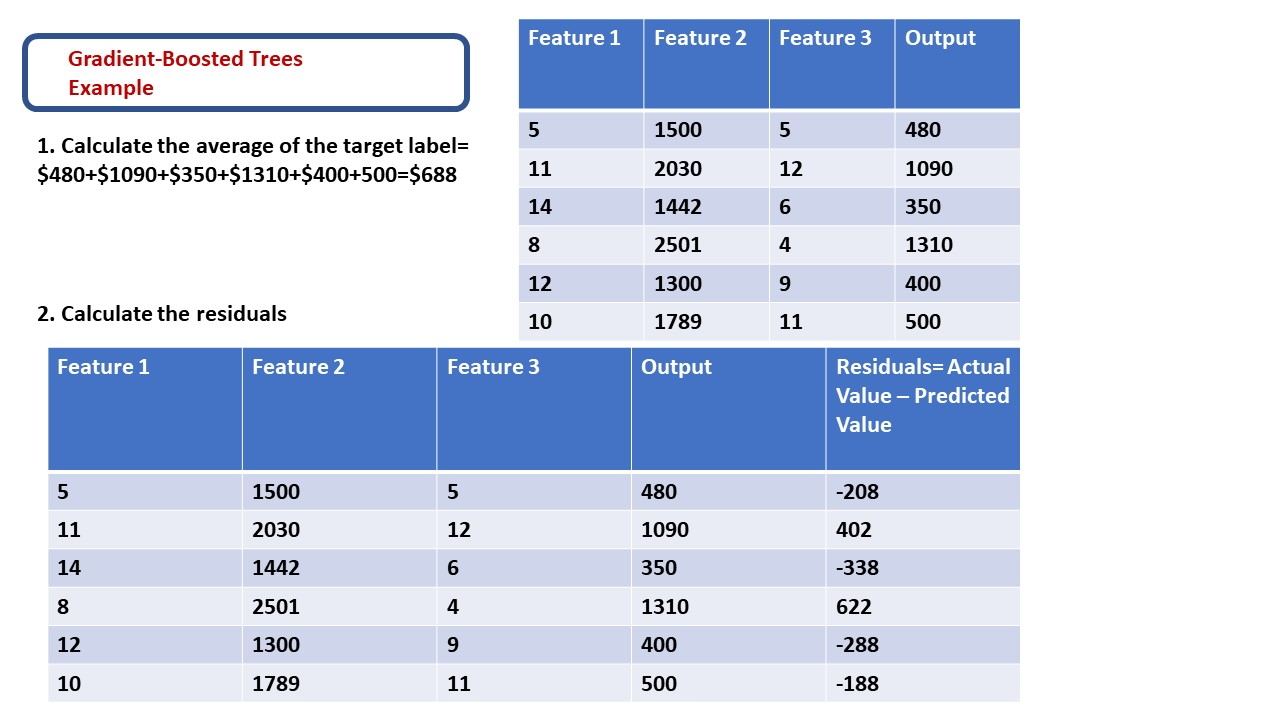

In [15]:
Image(filename='/content/drive/MyDrive/DTRFXGB/GBoost0.jpg', width=900,height=900)

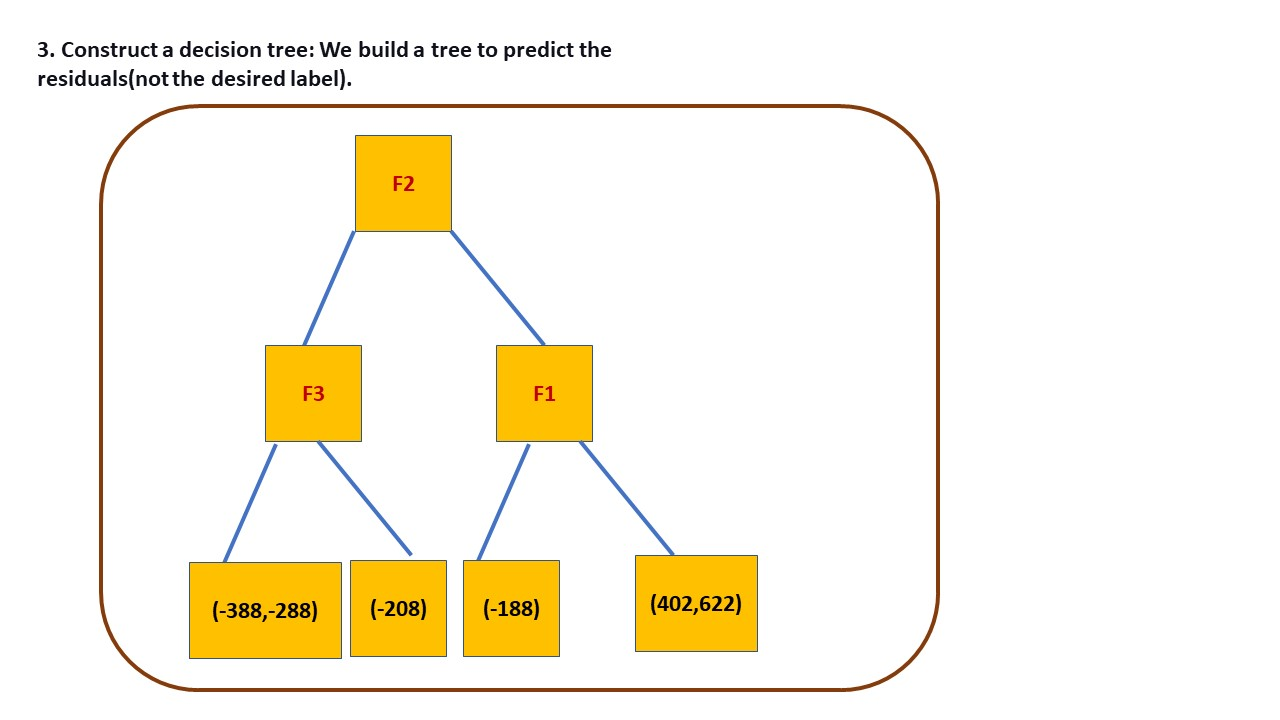

In [16]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/DTRFXGB/GBoost1.jpg', width=900,height=900)

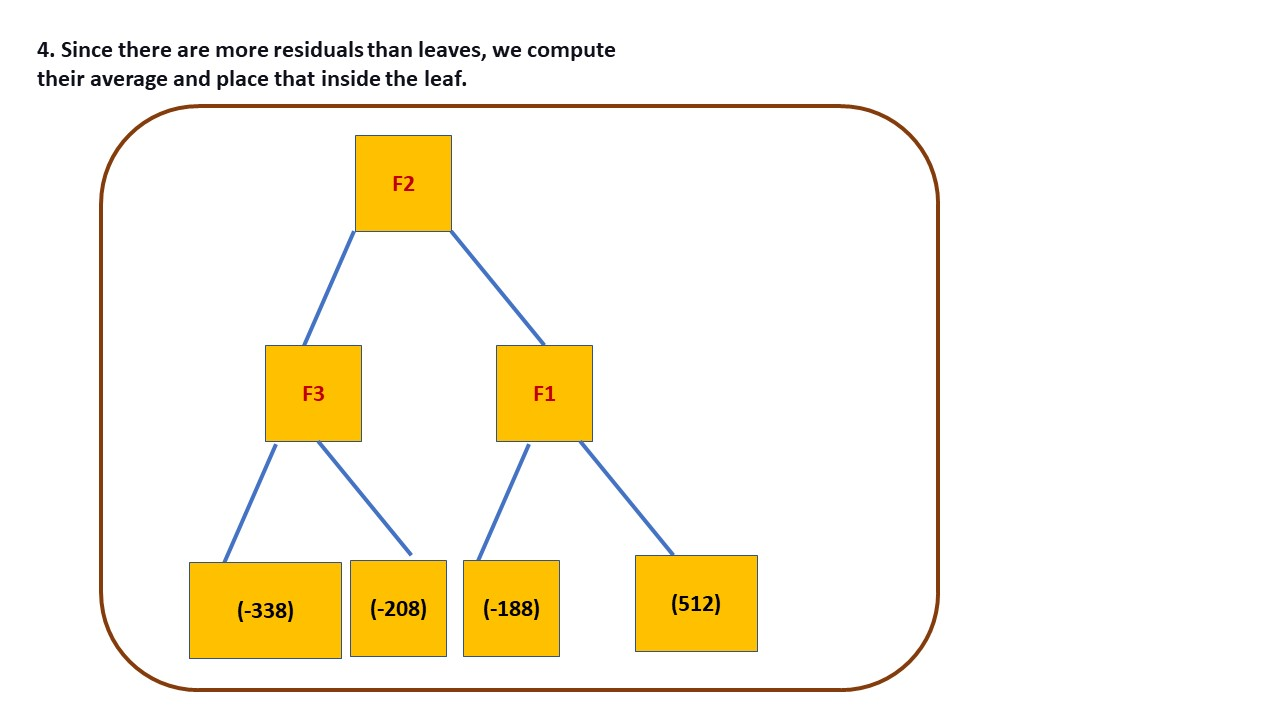

In [17]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/DTRFXGB/GBoost2.jpg', width=900,height=900)

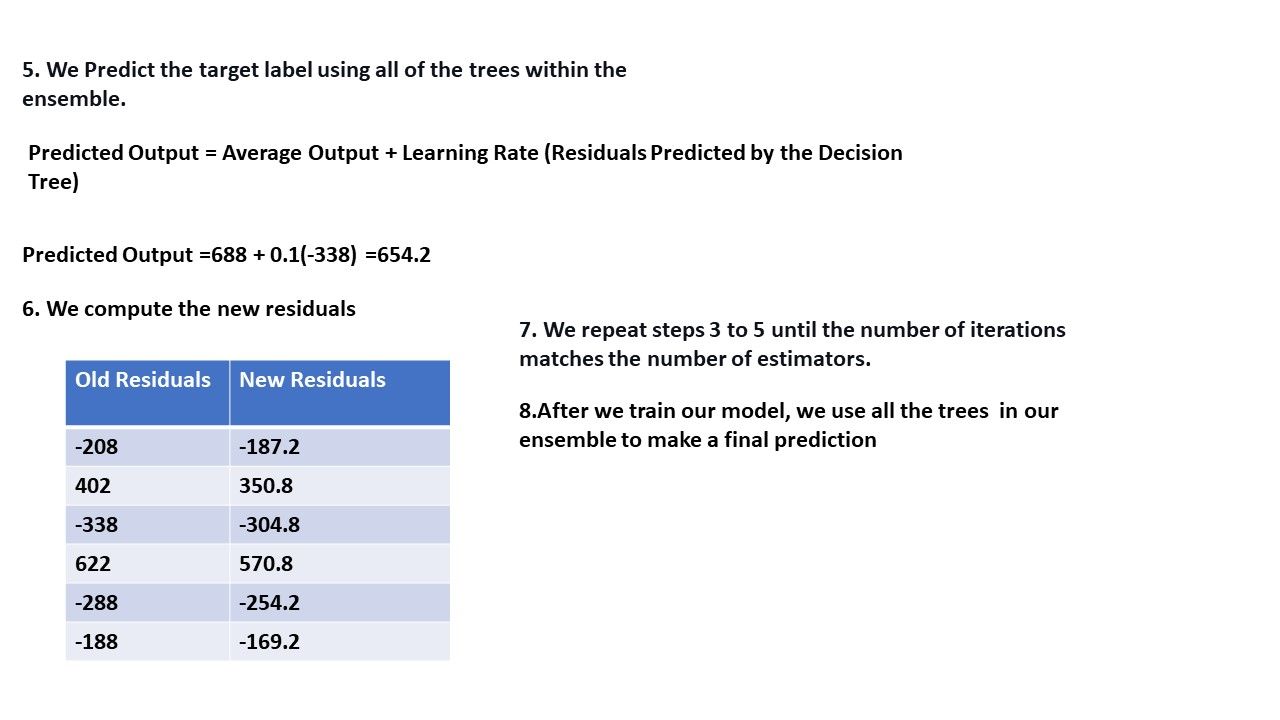

In [18]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/DTRFXGB/Gboost3.jpg', width=900,height=900)

Gradient Boosting Trees (GBT) is an ensemble learning method that builds a series of decision trees sequentially, with each tree attempting to correct the errors made by the previous ones. Here's why predicting the residuals is crucial and how it improves the model's accuracy:

### Understanding Residuals

Residuals are the differences between the actual values and the predicted values. For a given dataset X, y:

$ \text{Residual} = y_i - \hat{y}_i $

- $y_i$: The actual value
- $\hat{y}_i$ : The predicted value from the model.

### Why Predict Residuals?

1. **Correcting Errors**:
   - In each iteration of GBT, a new decision tree is fitted to the residuals of the current model. By focusing on the residuals, the new tree aims to correct the errors made by the previous model. This process incrementally improves the model by addressing the shortcomings of the previous predictions.

2. **Reducing Bias**:
   - The initial model might have a high bias, meaning it underfits the data. By fitting trees to the residuals, GBT effectively reduces this bias. Each new tree focuses on the remaining unexplained variance, leading to a more accurate overall model.

3. **Improving Predictions**:
   - After each iteration, the predictions are updated by adding the predictions from the new tree to the previous predictions. This iterative process allows the model to make finer adjustments and converge to a more accurate solution.

### How It Works

1. **Initialize the Model**:
   - Start with an initial prediction, often the mean of the target values for regression.

$ F_0(x) = \frac{1}{N} \sum_{i=1}^{N} y_i $

2. **Iterative Residual Prediction**:
   - For each iteration $m$, compute the residuals for the current model:

$ r_i^{(m)} = y_i - F_{m-1}(x_i) $

   - Fit a new decision tree $h_m(x)$ to these residuals.

3. **Update the Model**:
   - Update the current model by adding the predictions of the new tree, scaled by a learning rate $\eta$:

$ F_m(x) = F_{m-1}(x) + \eta h_m(x) $

4. **Repeat**:
   - Repeat steps 2 and 3 for a specified number of iterations or until convergence.

### Example

Let's continue with the example and perform four iterations of gradient boosting. We'll use the same small dataset and go through each step in detail.

### Dataset
| X | y |
|----|----|
| 1 | 2 |
| 2 | 3 |
| 3 | 5 |
| 4 | 7 |
| 5 | 11 |

### Iteration 1

#### Step 1: Initialize the Model
Initial prediction $ F_0 $:

$
F_0 = \frac{2 + 3 + 5 + 7 + 11}{5} = \frac{28}{5} = 5.6
$

#### Step 2: Calculate Residuals

Residuals $ r_i $ :


| X | y | Initial Prediction $F_0$ | Residual $r_i$ |
|----|----|-------------------------------|--------------------|
| 1 | 2 | 5.6 | 2 - 5.6 = -3.6 |
| 2 | 3 | 5.6 | 3 - 5.6 = -2.6 |
| 3 | 5 | 5.6 | 5 - 5.6 = -0.6 |
| 4 | 7 | 5.6 | 7 - 5.6 = 1.4 |
| 5 | 11 | 5.6 | 11 - 5.6 = 5.4 |

#### Step 3: Fit a Simple Model to Residuals
Simple tree prediction:

$
\text{Prediction from tree} = 
\begin{cases} 
-3 & \text{if } X \leq 2 \\
1 & \text{if } X > 2 
\end{cases}
$

#### Step 4: Update the Prediction
Learning rate $\alpha = 0.1$.

| X | Updated Prediction $F_1$ |
|----|------------------------------|
| 1 | 5.6 + 0.1 * (-3) = 5.3 |
| 2 | 5.6 + 0.1 * (-3) = 5.3 |
| 3 | 5.6 + 0.1 * 1 = 5.7 |
| 4 | 5.6 + 0.1 * 1 = 5.7 |
| 5 | 5.6 + 0.1 * 1 = 5.7 |

### Iteration 2

#### Step 2: Calculate Residuals

| X | y | Updated Prediction $F_1$ | Residual $r_i$ |
|----|----|------------------------------|--------------------|
| 1 | 2 | 5.3 | 2 - 5.3 = -3.3 |
| 2 | 3 | 5.3 | 3 - 5.3 = -2.3 |
| 3 | 5 | 5.7 | 5 - 5.7 = -0.7 |
| 4 | 7 | 5.7 | 7 - 5.7 = 1.3 |
| 5 | 11 | 5.7 | 11 - 5.7 = 5.3 |

#### Step 3: Fit a Simple Model to Residuals
Simple tree prediction:

$
\text{Prediction from tree} = 
\begin{cases} 
-2.5 & \text{if } X \leq 2 \\
0.5 & \text{if } X > 2 
\end{cases}
$

#### Step 4: Update the Prediction

| X | Updated Prediction $F_2$ |
|----|------------------------------|
| 1 | 5.3 + 0.1 * (-2.5) = 5.05|
| 2 | 5.3 + 0.1 * (-2.5) = 5.05|
| 3 | 5.7 + 0.1 * 0.5 = 5.75 |
| 4 | 5.7 + 0.1 * 0.5 = 5.75 |
| 5 | 5.7 + 0.1 * 0.5 = 5.75 |

### Iteration 3

#### Step 2: Calculate Residuals

| X | y | Updated Prediction $F_2$ | Residual $r_i$ |
|----|----|------------------------------|--------------------|
| 1 | 2 | 5.05 | 2 - 5.05 = -3.05 |
| 2 | 3 | 5.05 | 3 - 5.05 = -2.05 |
| 3 | 5 | 5.75 | 5 - 5.75 = -0.75 |
| 4 | 7 | 5.75 | 7 - 5.75 = 1.25 |
| 5 | 11 | 5.75 | 11 - 5.75 = 5.25 |

#### Step 3: Fit a Simple Model to Residuals
Simple tree prediction:

$
\text{Prediction from tree} = 
\begin{cases} 
-2 & \text{if } X \leq 2 \\
0.5 & \text{if } X > 2 
\end{cases}
$

#### Step 4: Update the Prediction

| X | Updated Prediction $F_3$ |
|----|------------------------------|
| 1 | 5.05 + 0.1 * (-2) = 4.85|
| 2 | 5.05 + 0.1 * (-2) = 4.85|
| 3 | 5.75 + 0.1 * 0.5 = 5.8 |
| 4 | 5.75 + 0.1 * 0.5 = 5.8 |
| 5 | 5.75 + 0.1 * 0.5 = 5.8 |

### Iteration 4

#### Step 2: Calculate Residuals

| X | y | Updated Prediction $F_3$ | Residual $r_i$ |
|----|----|------------------------------|--------------------|
| 1 | 2 | 4.85 | 2 - 4.85 = -2.85 |
| 2 | 3 | 4.85 | 3 - 4.85 = -1.85 |
| 3 | 5 | 5.8 | 5 - 5.8 = -0.8 |
| 4 | 7 | 5.8 | 7 - 5.8 = 1.2 |
| 5 | 11 | 5.8 | 11 - 5.8 = 5.2 |

#### Step 3: Fit a Simple Model to Residuals
Simple tree prediction:

$
\text{Prediction from tree} = 
\begin{cases} 
-2 & \text{if } X \leq 2 \\
0.4 & \text{if } X > 2 
\end{cases}
$

#### Step 4: Update the Prediction

| X | Updated Prediction $F_4$ |
|----|------------------------------|
| 1 | 4.85 + 0.1 * (-2) = 4.65|
| 2 | 4.85 + 0.1 * (-2) = 4.65|
| 3 | 5.8 + 0.1 * 0.4 = 5.84 |
| 4 | 5.8 + 0.1 * 0.4 = 5.84 |
| 5 | 5.8 + 0.1 * 0.4 = 5.84 |

### Summary
After four iterations, our model's predictions have been updated and improved. Here's the final table:

| X | y | Final Prediction $F_4$ |
|----|----|----------------------------|
| 1 | 2 | 4.65 |
| 2 | 3 | 4.65 |
| 3 | 5 | 5.84 |
| 4 | 7 | 5.84 |
| 5 | 11 | 5.84 |

#### Example for Gradient-Boosted Tree

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1)


c:\Users\behra\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [20]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)

#### **2.We do train test split**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### **3. We use two nodes with three decision trees in GradientBoostingRegressor**

In [22]:
regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0
)
regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

#### **4. We compute the errors and the best estimators.**

In [23]:
errors = [mean_squared_error(y_test, y_pred) for y_pred in regressor.staged_predict(X_test)]

best_n_estimators = np.argmin(errors)

In [28]:
print(errors)

[26.18054508011996, 25.760722417844164, 22.244029153157683]


In [24]:
best_n_estimators

2

In [29]:
trainerrors = [mean_squared_error(y_train, y_pred) for y_pred in regressor.staged_predict(X_train)]

best_n_estimators = np.argmin(trainerrors)

print(trainerrors)

[25.883973837995132, 17.52005512370928, 14.265115508421726]


### **5. We use the best estimators and create our model.**




In [25]:
best_regressor = GradientBoostingRegressor(
    max_depth=2,

    learning_rate=1.0
)
best_regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2)

### **6. We predict our test set**


In [26]:
y_pred = best_regressor.predict(X_test)



### **7. compute the mean absolute error.**

In [27]:
mean_absolute_error(y_test, y_pred)

2.7034276645479998

# **Part IV**
# **Extreme Gradient Boosting(XGBoost)Algorithm**

XGBoost is one of the best gradient-boosted tree implementations currently available for classification and regression. XGBoost was designed using the general principles of gradient boosting, combining weak learners into a strong learner. But while gradient-boosted trees are built sequentially – slowly learning from data to improve its prediction in succeeding iteration, XGBoost builds trees in parallel.

XGBoost produces better prediction performance by controlling model complexity and reducing overfitting through its built-in regularization. XGBoost uses an approximate algorithm to find split points when finding the best split points for a continuous feature. 

The approximate splitting method uses discrete bins to bucket continuous features, significantly speeding up model training. XGBoost includes another tree growing method using a histogram-based algorithm which provides an even more efficient method of bucketing continuous features into discrete bins. But while the approximate method creates a new set of bins per iteration, the histogram-based approach reuses bins over multiple iterations. This approach allows for additional optimizations that are not achievable with the approximate method, such as the ability to cache bins and parent and sibling histogram subtraction. To optimize sorting operations, XGBoost stores sorted data in in-memory units of blocks. Sorting blocks can be efficiently distributed and performed by parallel CPU cores. XGBoost can effectively handle weighted data via its weighted quantile sketch algorithm, can efficiently handle sparse data, is cache-aware, and supports out-of-core computing by utilizing disk space for large datasets, so data does not have to fit in memory.

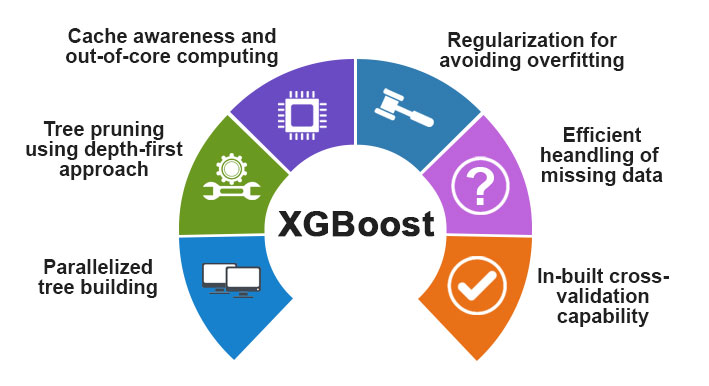

In [3]:
Image(filename=r'images\xgboostoverview.png')

### Mathematical Foundation of XGBoost




1. **Objective Function**:
   XGBoost optimizes a combination of training loss and regularization to prevent overfitting:

   $
   \text{Obj}(\theta) = \sum_{i=1}^{n} l(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega(f_k)
   $

   - $l $ is a differentiable convex loss function (e.g., mean squared error for regression).
   - $\Omega(f_k) $ is the regularization term for tree $k $:
     $
     \Omega(f) = \gamma T + \frac{1}{2} \lambda \| w \|^2
     $
     where $T $ is the number of leaves in the tree, $w $ are leaf weights, and $\gamma $ and $\lambda $ are regularization parameters.

2. **Additive Training**:
   Trees are added iteratively to minimize the objective function. At each step $t $, the model is:

   $
   \hat{y}_i^{(t)} = \hat{y}_i^{(t-1)} + f_t(x_i)
   $

   The objective at step $t $ is:

   $
   \text{Obj}^{(t)} = \sum_{i=1}^{n} l(y_i, \hat{y}_i^{(t)}) + \Omega(f_t)
   $

3. **Second-Order Approximation**:
   XGBoost uses a second-order Taylor expansion to approximate the objective function:

   $
   \text{Obj}^{(t)} \approx \sum_{i=1}^{n} [ l(y_i, \hat{y}_i^{(t-1)}) + g_i f_t(x_i) + \frac{1}{2} h_i f_t(x_i)^2 ] + \Omega(f_t)
   $

   where $g_i $ and $h_i $ are the first and second derivatives of the loss function w.r.t. the prediction $\hat{y}_i^{(t-1)} $.

4. **Split Finding**:
   The optimal split for a tree is found by calculating the gain from splitting the data, which is:

   $
   \text{Gain} = \frac{1}{2} \left( \frac{G_L^2}{H_L + \lambda} + \frac{G_R^2}{H_R + \lambda} - \frac{(G_L + G_R)^2}{H_L + H_R + \lambda} \right) - \gamma
   $

   where $G_L $ and $H_L $ are the sums of the first and second derivatives of the loss function for the left child, and similarly for the right child.

5. **Regularization**:
   Regularization helps to control the complexity of the model by penalizing large weights in leaf nodes, leading to better generalization.

### References

For further details, you can refer to the comprehensive explanation on [GeeksforGeeks XGBoost](https://www.geeksforgeeks.org/xgboost/).

#### 1. Regularization and avoiding overfitting

Using the built-in regularization parameter **λ** that this algorithm has, we actually apply regularization in each step in order to prevent facing overfitting in our training process. It makes XGBoost stands out compared to other ensemble algorithms. We will see more about the λ parameter in our example.

#### 2. Efficient handling of missing values data

XGBoost handles missing values during the training process using a technique called "sparsity aware split finding". Here is how it works.

- 1. Considering missing values as a separate group
- 2. Finding optimal direction for missing values in order to minimize the loss function.
- 3. Assigning the direction to missing values

#### 3. Parellelized Building Trees
XGBoost builds trees in parallel using a technique called "column block" or "histogram-based" approach. Here's a brief explanation:

1. **Histogram-based Splits**: Instead of evaluating splits for all possible feature values, XGBoost discretizes the feature values into bins and computes histograms. This reduces computational complexity.
2. **Parallel Computation**: Each feature's histogram can be computed independently and in parallel across multiple threads.
3. **Optimal Split Search**: Once the histograms are computed, the algorithm finds the best split for each feature independently. The best splits are then combined to form the tree nodes.

This approach efficiently utilizes multiple CPU cores, speeding up the tree-building process.


#### 4. Cache Aware Access and Blocking out-of-core Computation:

XGBoost uses hardware optimally as well. XGBoost tries to store important and common values like gradients in the cache memory of the processor which makes computation a lot faster. Also, when the amount of data increases enough that nor the cache, neither the memory have space, XGBoost **comparesses** the data and stores it in one hard drive or can even split the data and store it in multiple data. And, when the data is needed, it decompress the data and use it.

### Example (Source : StatQuest)

#### 1. Dataset and Initial Prediction:

In XGBoost the initial prediction is set to **0.5**.



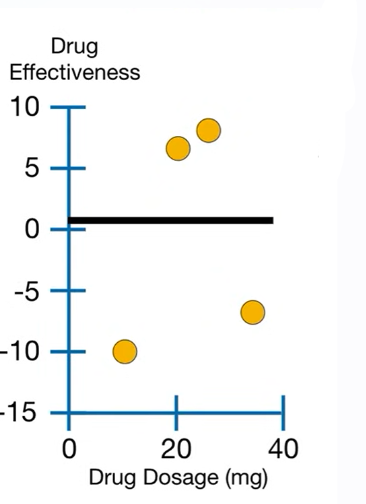

#### 2. Calculate Residuals:


Instance 1: 
$R_1 = -10 - 0.5 = -10.5$

Instance 2: 
$R_2 = 7 - 0.5 = 6.5$

Instance 3: 
$R_3 = 8 - 0.5 = 7.5$

Instance 4: 
$R_4 = -7 - 0.5 = -7.5$

#### 3. Build the new Tree:

For the start point we put all the calculated residuals to the same node named root.( [-10.5, 6.5, 7.5, -7.5] ) Then we have two metrics to split the tree.
- 1. Similarity Score
- 2. Gain

$$ Similarity \: Score = \frac{(Sum\:of\:Residuals)^2}{Number\:of\:Residuals + λ} $$

Where **λ** is the **regularization parameter** that we talked about previously.

We want to find a thershold that gives us the maximium similarity score.



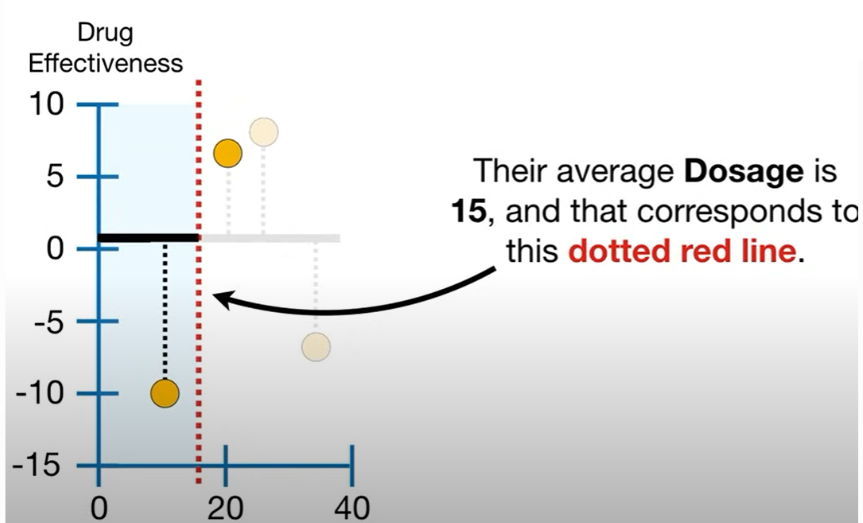

$$ Similarity \: Score = \frac{(7.5-7.5-10.5+6.5)^2}{4 + λ} = 4$$

To simplify the calculations we asssum λ = 0;

Appliying thershold

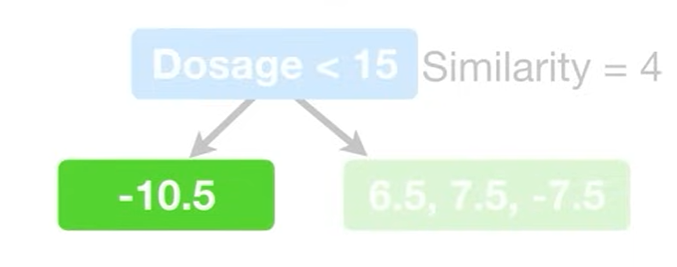

Now, we calculate the similarity score.

Similarity score for the left node : $\frac{(-10.5)^2}{1 + 0} = 110.25$.

Similarity score for the right child: $\frac{(6.5 + 7.5 - 7.5)^2}{3 + 0} = 14.08$.



Gain of the split definition:

$$ Gain = RChild_{similarity} + LChild_{similarity} - Root_{similarity} = 110.25 + 14.08 - 4 = \mathbf{120.33}$$

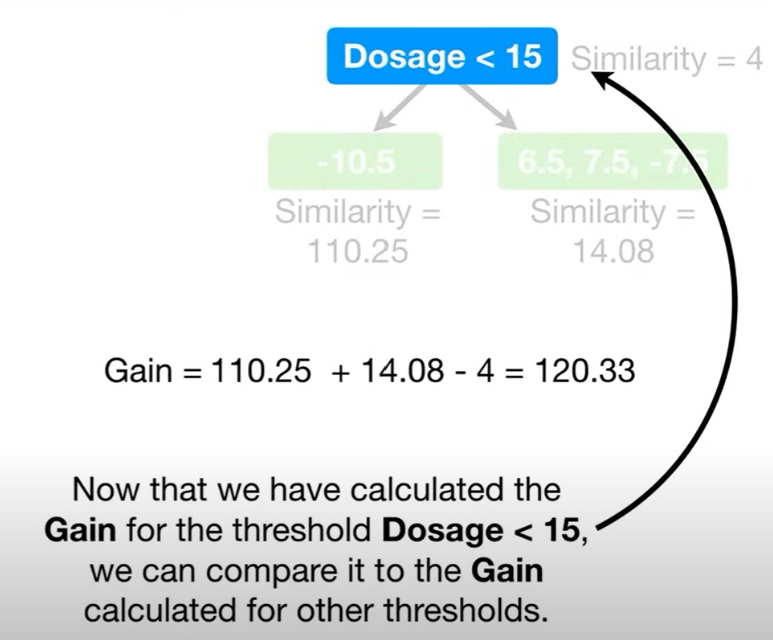

Now we choose all the possible thersholds to find the thershold that gives us the most Gain of split.

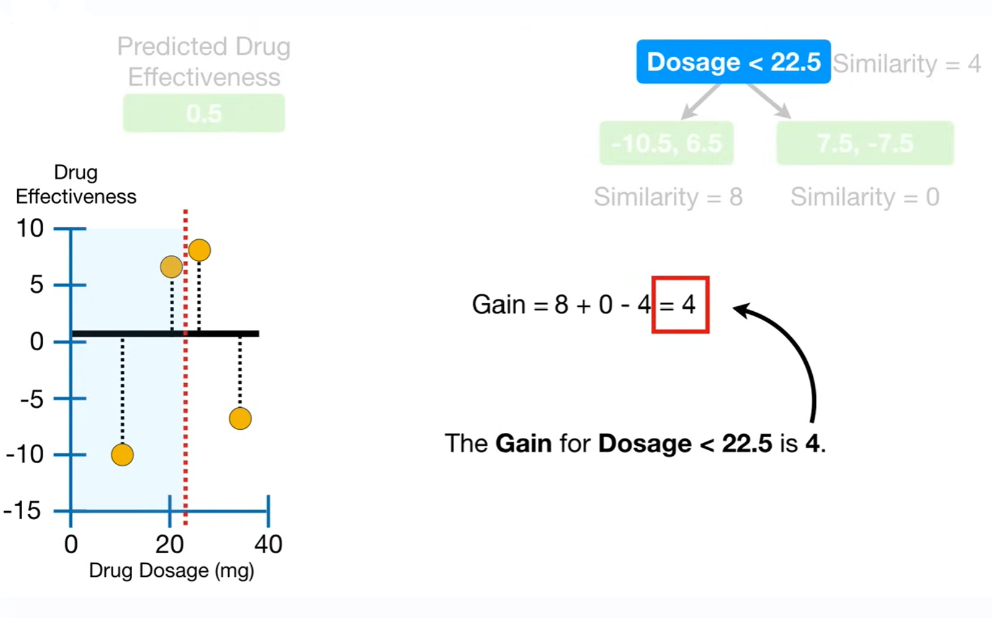

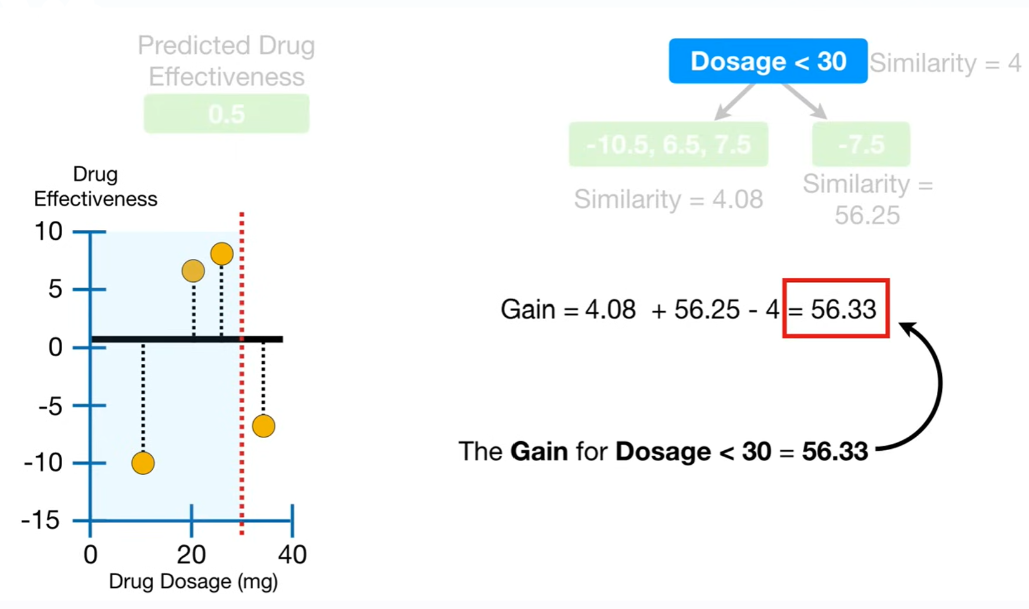

**The threshold 15 as our splitting value for this node as it produced the highest gain.**

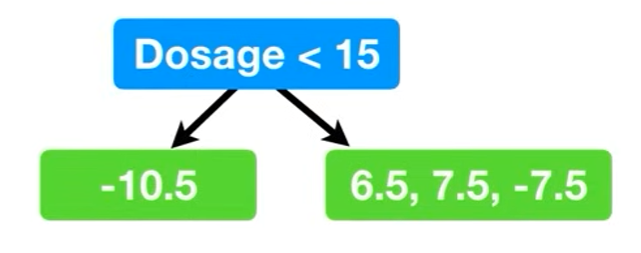

Now for the right child node, we apply the same algorithm that we did for the root node in order to split the node. The resulting gains suggest that the threshold producing the most gains is the dosage 30 threshold:

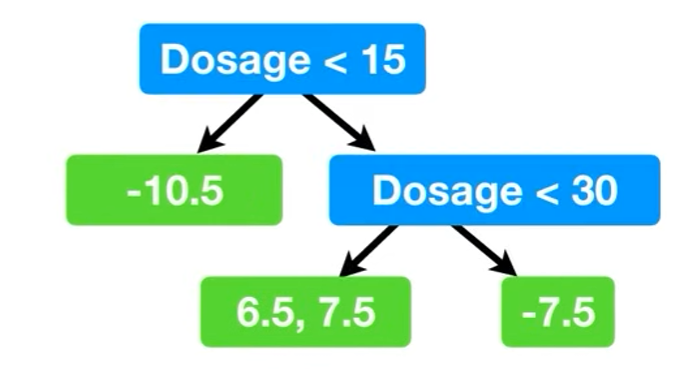

let's put **λ = 1**. So, this time, we actually want the model to apply regularization. The new similarity scores are as follows:

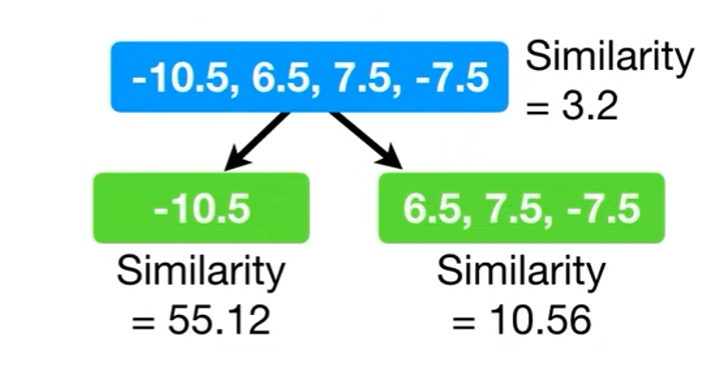

Recalculate the Gain with $ λ = 1$ and comparing to $ λ = 1$.

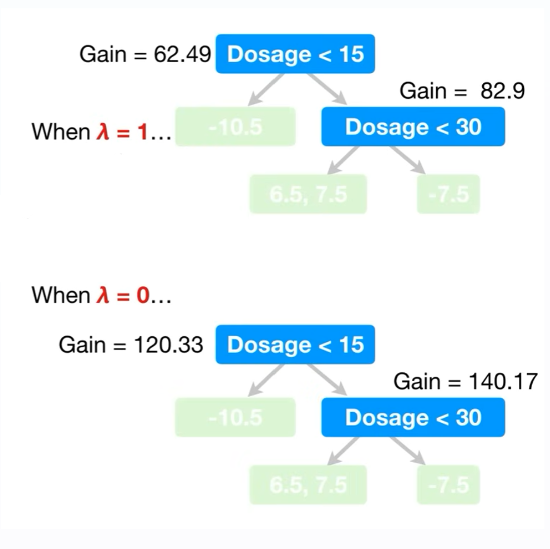

#### 3. The Output

We define the output value of each leaf as follows:
$$ Output\:Value = \frac{Sum\:of\:Residuals}{Number\:of\:Residuals + λ}$$


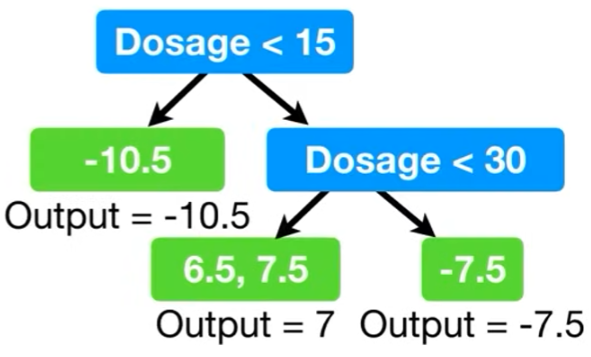

#### Prediction

$$ New \: Prediction \:\: = \:\: Old \: Predictioin \:\: + \:\: Learning Rate \times Residual \\ $$
$$P_{new} \:\: = \:\: P_{old} \:\:+\:\: η×R$$

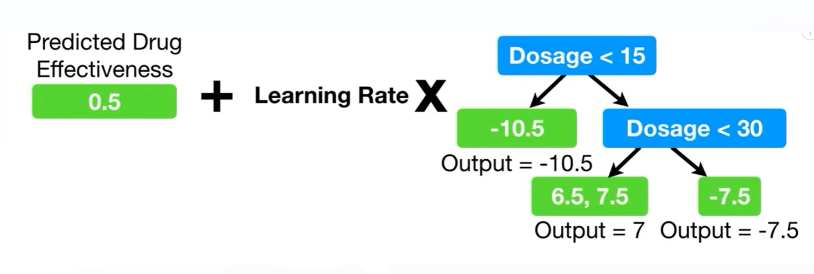

The learning rate is set to 0.3 by default, so for example for the first instance we'd have:
$$ P_new = 0.5 + 0.3×-10.5 = -2.65$$

So now we can calculate the new predictions for our instances and continue the steps for the next sequential XGBoost tree just the way we did for sequential decision trees in GBT and we continue untill our residual values are super small or we reach the maximum number of trees.

#**Import the necessary libraries for XGBoost Example**

In [4]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay


### **2. Import the data**


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/XB-Data/Telcom.csv')


In [ ]:
df.head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Total Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65         820.5   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70        5036.3   

  Churn Label Churn Value Churn Score  CLTV                   Churn Reason  
0         Yes           1          86  3239   Competitor made better offer  
1         Yes           1          67  2701                          Moved  
2         Yes           1          86  5372                          Moved  
3         Yes           1          84  5003                          Moved  
4         Yes           1          89  5340  Competitor had better devices  

[5 rows x 33 columns]

### **3. Data exploration**

In [ ]:
df.drop(['Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'],
        axis=1, inplace=True)
df.head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...   

  Device Protection Tech Support Streaming TV  Streaming Movies  \
0                No           No           No                No   
1                No           No           No                No   
2               Yes           No          Yes               Yes   
3               Yes          Yes          Yes               Yes   
4               Yes           No          Yes               Yes   

         Contract Paperless Billing             Payment Method  \
0  Month-to-month               Yes               Mailed check   
1  Month-to-month               Yes           Electronic check   
2  Month-to-month               Yes           Electronic check   
3  Month-to-month               Yes           Electronic check   
4  Month-to-month               Yes  Bank transfer (automatic)   

  Monthly Charges Total Charges Churn Value  
0           53.85        108.15           1  
1           70.70        151.65           1  
2           99.65         820.5           1  
3          104.80       3046.05           1  
4          103.70        5036.3           1  

[5 rows x 29 columns]

In [ ]:
df['Count'].unique()

array([1])

In [ ]:
df['Country'].unique()

array(['United States'], dtype=object)

In [ ]:
df['State'].unique()

array(['California'], dtype=object)

In [ ]:
df['City'].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [ ]:
df.drop(['CustomerID', 'Count', 'Country', 'State', 'Lat Long'],
        axis=1, inplace=True)
df.head()

City  Zip Code   Latitude   Longitude  Gender Senior Citizen  \
0  Los Angeles     90003  33.964131 -118.272783    Male             No   
1  Los Angeles     90005  34.059281 -118.307420  Female             No   
2  Los Angeles     90006  34.048013 -118.293953  Female             No   
3  Los Angeles     90010  34.062125 -118.315709  Female             No   
4  Los Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure Months Phone Service  ... Device Protection  \
0      No         No              2           Yes  ...                No   
1      No        Yes              2           Yes  ...                No   
2      No        Yes              8           Yes  ...               Yes   
3     Yes        Yes             28           Yes  ...               Yes   
4      No        Yes             49           Yes  ...               Yes   

  Tech Support Streaming TV Streaming Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless Billing             Payment Method Monthly Charges Total Charges  \
0               Yes               Mailed check           53.85        108.15   
1               Yes           Electronic check           70.70        151.65   
2               Yes           Electronic check           99.65         820.5   
3               Yes           Electronic check          104.80       3046.05   
4               Yes  Bank transfer (automatic)          103.70        5036.3   

  Churn Value  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 24 columns]

In [ ]:
df['City'].replace(' ', '_', regex=True, inplace=True)
df.head()

City  Zip Code   Latitude   Longitude  Gender Senior Citizen  \
0  Los_Angeles     90003  33.964131 -118.272783    Male             No   
1  Los_Angeles     90005  34.059281 -118.307420  Female             No   
2  Los_Angeles     90006  34.048013 -118.293953  Female             No   
3  Los_Angeles     90010  34.062125 -118.315709  Female             No   
4  Los_Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure Months Phone Service  ... Device Protection  \
0      No         No              2           Yes  ...                No   
1      No        Yes              2           Yes  ...                No   
2      No        Yes              8           Yes  ...               Yes   
3     Yes        Yes             28           Yes  ...               Yes   
4      No        Yes             49           Yes  ...               Yes   

  Tech Support Streaming TV Streaming Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless Billing             Payment Method Monthly Charges Total Charges  \
0               Yes               Mailed check           53.85        108.15   
1               Yes           Electronic check           70.70        151.65   
2               Yes           Electronic check           99.65         820.5   
3               Yes           Electronic check          104.80       3046.05   
4               Yes  Bank transfer (automatic)          103.70        5036.3   

  Churn Value  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 24 columns]

In [ ]:
df['City'].unique()[0:10]

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', 'Lynwood',
       'Marina_Del_Rey', 'Inglewood', 'Santa_Monica', 'Torrance',
       'Whittier', 'La_Habra'], dtype=object)

In [ ]:
df.columns = df.columns.str.replace(' ', '_')
df.head()

City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
0  Los_Angeles     90003  33.964131 -118.272783    Male             No   
1  Los_Angeles     90005  34.059281 -118.307420  Female             No   
2  Los_Angeles     90006  34.048013 -118.293953  Female             No   
3  Los_Angeles     90010  34.062125 -118.315709  Female             No   
4  Los_Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure_Months Phone_Service  ... Device_Protection  \
0      No         No              2           Yes  ...                No   
1      No        Yes              2           Yes  ...                No   
2      No        Yes              8           Yes  ...               Yes   
3     Yes        Yes             28           Yes  ...               Yes   
4      No        Yes             49           Yes  ...               Yes   

  Tech_Support Streaming_TV Streaming_Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless_Billing             Payment_Method Monthly_Charges Total_Charges  \
0               Yes               Mailed check           53.85        108.15   
1               Yes           Electronic check           70.70        151.65   
2               Yes           Electronic check           99.65         820.5   
3               Yes           Electronic check          104.80       3046.05   
4               Yes  Bank transfer (automatic)          103.70        5036.3   

  Churn_Value  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 24 columns]

In [ ]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

In [ ]:
df['Phone_Service'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['Total_Charges'].unique()

array(['108.15', '151.65', '820.5', ..., '7362.9', '346.45', '6844.5'],
      dtype=object)

In [ ]:
len(df.loc[df['Total_Charges'] == ' '])

11

In [ ]:
df.loc[df['Total_Charges'] == ' ']

City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
2234  San_Bernardino     92408  34.084909 -117.258107  Female             No   
2438    Independence     93526  36.869584 -118.189241    Male             No   
2568       San_Mateo     94401  37.590421 -122.306467  Female             No   
2667       Cupertino     95014  37.306612 -122.080621    Male             No   
2856        Redcrest     95569  40.363446 -123.835041  Female             No   
4331     Los_Angeles     90029  34.089953 -118.294824    Male             No   
4687        Sun_City     92585  33.739412 -117.173334    Male             No   
5104      Ben_Lomond     95005  37.078873 -122.090386  Female             No   
5719        La_Verne     91750  34.144703 -117.770299    Male             No   
6772            Bell     90201  33.970343 -118.171368  Female             No   
6840      Wilmington     90744  33.782068 -118.262263    Male             No   

     Partner Dependents  Tenure_Months Phone_Service  ...  \
2234     Yes         No              0            No  ...   
2438      No         No              0           Yes  ...   
2568     Yes         No              0           Yes  ...   
2667     Yes        Yes              0           Yes  ...   
2856     Yes         No              0            No  ...   
4331     Yes        Yes              0           Yes  ...   
4687     Yes        Yes              0           Yes  ...   
5104     Yes        Yes              0           Yes  ...   
5719     Yes        Yes              0           Yes  ...   
6772     Yes        Yes              0           Yes  ...   
6840      No        Yes              0           Yes  ...   

        Device_Protection         Tech_Support         Streaming_TV  \
2234                  Yes                  Yes                  Yes   
2438  No internet service  No internet service  No internet service   
2568                  Yes                   No                  Yes   
2667  No internet service  No internet service  No internet service   
2856                  Yes                  Yes                  Yes   
4331  No internet service  No internet service  No internet service   
4687  No internet service  No internet service  No internet service   
5104  No internet service  No internet service  No internet service   
5719  No internet service  No internet service  No internet service   
6772                  Yes                  Yes                  Yes   
6840                   No                  Yes                   No   

         Streaming_Movies  Contract Paperless_Billing  \
2234                   No  Two year               Yes   
2438  No internet service  Two year                No   
2568                  Yes  Two year                No   
2667  No internet service  Two year                No   
2856                   No  Two year                No   
4331  No internet service  Two year                No   
4687  No internet service  Two year                No   
5104  No internet service  Two year                No   
5719  No internet service  One year               Yes   
6772                   No  Two year                No   
6840                   No  Two year               Yes   

                 Payment_Method Monthly_Charges Total_Charges Churn_Value  
2234  Bank transfer (automatic)           52.55                         0  
2438               Mailed check           20.25                         0  
2568               Mailed check           80.85                         0  
2667               Mailed check           25.75                         0  
2856    Credit card (automatic)           56.05                         0  
4331               Mailed check           19.85                         0  
4687               Mailed check           25.35                         0  
5104               Mailed check           20.00                         0  
5719               Mailed check           19.70                         0  
6772               Maile

In [ ]:
df.loc[(df['Total_Charges'] == ' '), 'Total_Charges'] = 0

In [ ]:
df.loc[df['Tenure_Months'] == 0]

City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
2234  San_Bernardino     92408  34.084909 -117.258107  Female             No   
2438    Independence     93526  36.869584 -118.189241    Male             No   
2568       San_Mateo     94401  37.590421 -122.306467  Female             No   
2667       Cupertino     95014  37.306612 -122.080621    Male             No   
2856        Redcrest     95569  40.363446 -123.835041  Female             No   
4331     Los_Angeles     90029  34.089953 -118.294824    Male             No   
4687        Sun_City     92585  33.739412 -117.173334    Male             No   
5104      Ben_Lomond     95005  37.078873 -122.090386  Female             No   
5719        La_Verne     91750  34.144703 -117.770299    Male             No   
6772            Bell     90201  33.970343 -118.171368  Female             No   
6840      Wilmington     90744  33.782068 -118.262263    Male             No   

     Partner Dependents  Tenure_Months Phone_Service  ...  \
2234     Yes         No              0            No  ...   
2438      No         No              0           Yes  ...   
2568     Yes         No              0           Yes  ...   
2667     Yes        Yes              0           Yes  ...   
2856     Yes         No              0            No  ...   
4331     Yes        Yes              0           Yes  ...   
4687     Yes        Yes              0           Yes  ...   
5104     Yes        Yes              0           Yes  ...   
5719     Yes        Yes              0           Yes  ...   
6772     Yes        Yes              0           Yes  ...   
6840      No        Yes              0           Yes  ...   

        Device_Protection         Tech_Support         Streaming_TV  \
2234                  Yes                  Yes                  Yes   
2438  No internet service  No internet service  No internet service   
2568                  Yes                   No                  Yes   
2667  No internet service  No internet service  No internet service   
2856                  Yes                  Yes                  Yes   
4331  No internet service  No internet service  No internet service   
4687  No internet service  No internet service  No internet service   
5104  No internet service  No internet service  No internet service   
5719  No internet service  No internet service  No internet service   
6772                  Yes                  Yes                  Yes   
6840                   No                  Yes                   No   

         Streaming_Movies  Contract Paperless_Billing  \
2234                   No  Two year               Yes   
2438  No internet service  Two year                No   
2568                  Yes  Two year                No   
2667  No internet service  Two year                No   
2856                   No  Two year                No   
4331  No internet service  Two year                No   
4687  No internet service  Two year                No   
5104  No internet service  Two year                No   
5719  No internet service  One year               Yes   
6772                   No  Two year                No   
6840                   No  Two year               Yes   

                 Payment_Method Monthly_Charges Total_Charges Churn_Value  
2234  Bank transfer (automatic)           52.55             0           0  
2438               Mailed check           20.25             0           0  
2568               Mailed check           80.85             0           0  
2667               Mailed check           25.75             0           0  
2856    Credit card (automatic)           56.05             0           0  
4331               Mailed check           19.85             0           0  
4687               Mailed check           25.35             0           0  
5104               Mailed check           20.00             0           0  
5719               Mailed check           19.70             0           0  
6772               Maile

In [ ]:
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
dtype: object

In [ ]:
df.replace(' ', '_', regex=True, inplace=True)
df.head()

City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
0  Los_Angeles     90003  33.964131 -118.272783    Male             No   
1  Los_Angeles     90005  34.059281 -118.307420  Female             No   
2  Los_Angeles     90006  34.048013 -118.293953  Female             No   
3  Los_Angeles     90010  34.062125 -118.315709  Female             No   
4  Los_Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure_Months Phone_Service  ... Device_Protection  \
0      No         No              2           Yes  ...                No   
1      No        Yes              2           Yes  ...                No   
2      No        Yes              8           Yes  ...               Yes   
3     Yes        Yes             28           Yes  ...               Yes   
4      No        Yes             49           Yes  ...               Yes   

  Tech_Support Streaming_TV Streaming_Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless_Billing             Payment_Method Monthly_Charges Total_Charges  \
0               Yes               Mailed_check           53.85        108.15   
1               Yes           Electronic_check           70.70        151.65   
2               Yes           Electronic_check           99.65        820.50   
3               Yes           Electronic_check          104.80       3046.05   
4               Yes  Bank_transfer_(automatic)          103.70       5036.30   

  Churn_Value  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 24 columns]

In [ ]:
df.size

169032

# **4. Split our data**


In [ ]:
X = df.drop('Churn_Value', axis=1).copy()
X.head()

City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
0  Los_Angeles     90003  33.964131 -118.272783    Male             No   
1  Los_Angeles     90005  34.059281 -118.307420  Female             No   
2  Los_Angeles     90006  34.048013 -118.293953  Female             No   
3  Los_Angeles     90010  34.062125 -118.315709  Female             No   
4  Los_Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure_Months Phone_Service  ... Online_Backup  \
0      No         No              2           Yes  ...           Yes   
1      No        Yes              2           Yes  ...            No   
2      No        Yes              8           Yes  ...            No   
3     Yes        Yes             28           Yes  ...            No   
4      No        Yes             49           Yes  ...           Yes   

  Device_Protection Tech_Support Streaming_TV Streaming_Movies  \
0                No           No           No               No   
1                No           No           No               No   
2               Yes           No          Yes              Yes   
3               Yes          Yes          Yes              Yes   
4               Yes           No          Yes              Yes   

         Contract Paperless_Billing             Payment_Method  \
0  Month-to-month               Yes               Mailed_check   
1  Month-to-month               Yes           Electronic_check   
2  Month-to-month               Yes           Electronic_check   
3  Month-to-month               Yes           Electronic_check   
4  Month-to-month               Yes  Bank_transfer_(automatic)   

  Monthly_Charges Total_Charges  
0           53.85        108.15  
1           70.70        151.65  
2           99.65        820.50  
3          104.80       3046.05  
4          103.70       5036.30  

[5 rows x 23 columns]

In [ ]:
y = df['Churn_Value'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn_Value, dtype: int64


# **5. We format the data with One-Hot Encoding**



In [ ]:
X.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
dtype: object

In [ ]:
pd.get_dummies(X, columns=['Payment_Method']).head()

City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
0  Los_Angeles     90003  33.964131 -118.272783    Male             No   
1  Los_Angeles     90005  34.059281 -118.307420  Female             No   
2  Los_Angeles     90006  34.048013 -118.293953  Female             No   
3  Los_Angeles     90010  34.062125 -118.315709  Female             No   
4  Los_Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure_Months Phone_Service  ... Streaming_TV  \
0      No         No              2           Yes  ...           No   
1      No        Yes              2           Yes  ...           No   
2      No        Yes              8           Yes  ...          Yes   
3     Yes        Yes             28           Yes  ...          Yes   
4      No        Yes             49           Yes  ...          Yes   

  Streaming_Movies        Contract Paperless_Billing Monthly_Charges  \
0               No  Month-to-month               Yes           53.85   
1               No  Month-to-month               Yes           70.70   
2              Yes  Month-to-month               Yes           99.65   
3              Yes  Month-to-month               Yes          104.80   
4              Yes  Month-to-month               Yes          103.70   

  Total_Charges Payment_Method_Bank_transfer_(automatic)  \
0        108.15                                    False   
1        151.65                                    False   
2        820.50                                    False   
3       3046.05                                    False   
4       5036.30                                     True   

  Payment_Method_Credit_card_(automatic) Payment_Method_Electronic_check  \
0                                  False                           False   
1                                  False                            True   
2                                  False                            True   
3                                  False                            True   
4                                  False                           False   

  Payment_Method_Mailed_check  
0                        True  
1                       False  
2                       False  
3                       False  
4                       False  

[5 rows x 26 columns]

In [ ]:
X_encoded = pd.get_dummies(X, columns=['City',
                                       'Gender',
                                       'Senior_Citizen',
                                       'Partner',
                                       'Dependents',
                                       'Phone_Service',
                                       'Multiple_Lines',
                                       'Internet_Service',
                                       'Online_Security',
                                       'Online_Backup',
                                       'Device_Protection',
                                       'Tech_Support',
                                       'Streaming_TV',
                                       'Streaming_Movies',
                                       'Contract',
                                       'Paperless_Billing',
                                       'Payment_Method'])
X_encoded.head()

Zip_Code   Latitude   Longitude  Tenure_Months  Monthly_Charges  \
0     90003  33.964131 -118.272783              2            53.85   
1     90005  34.059281 -118.307420              2            70.70   
2     90006  34.048013 -118.293953              8            99.65   
3     90010  34.062125 -118.315709             28           104.80   
4     90015  34.039224 -118.266293             49           103.70   

   Total_Charges  City_Acampo  City_Acton  City_Adelanto  City_Adin  ...  \
0         108.15        False       False          False      False  ...   
1         151.65        False       False          False      False  ...   
2         820.50        False       False          False      False  ...   
3        3046.05        False       False          False      False  ...   
4        5036.30        False       False          False      False  ...   

   Streaming_Movies_Yes  Contract_Month-to-month  Contract_One_year  \
0                 False                     True              False   
1                 False                     True              False   
2                  True                     True              False   
3                  True                     True              False   
4                  True                     True              False   

   Contract_Two_year  Paperless_Billing_No  Paperless_Billing_Yes  \
0              False                 False                   True   
1              False                 False                   True   
2              False                 False                   True   
3              False                 False                   True   
4              False                 False                   True   

   Payment_Method_Bank_transfer_(automatic)  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                      True   

   Payment_Method_Credit_card_(automatic)  Payment_Method_Electronic_check  \
0                                   False                            False   
1                                   False                             True   
2                                   False                             True   
3                                   False                             True   
4                                   False                            False   

   Payment_Method_Mailed_check  
0                         True  
1                        False  
2                        False  
3                        False  
4                        False  

[5 rows x 1178 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, stratify=y)


# **6.We Optimize our hyperparameters by Cross-Validation and GridSearch.**


In [ ]:
param_grid = {
     'max_depth': [4],
     'learning_rate': [0.1, 0.5, 0.08],
     'gamma': [0.25],
     'reg_lambda': [10.0, 20, 100],
      'scale_pos_weight': [3]}

optimal_params = GridSearchCV(
     estimator=xgb.XGBClassifier(objective='binary:logistic',
                                 eval_metric="logloss",
                                 seed=42,
                                 subsample=0.9,
                                 colsample_bytree=0.5,
                                 early_stopping_rounds=8,
                                 use_label_encoder=False),
     param_grid=param_grid,
     scoring='roc_auc',
     verbose=0,
     n_jobs = 10,
     cv = 3,
 )

In [ ]:
optimal_params.fit(X_train,
                    y_train,
                    eval_set=[(X_test, y_test)],
                    verbose=False)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, device=None,
                                     early_stopping_rounds=8,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'gamma': [0.25], 'learning_rate': [0.1, 0.5, 0.08],
                         'max_depth': [4], 'reg_lambda': [10.0, 20, 100],
                         'scale_pos_weight': [3]},
             scoring='roc_auc')

In [ ]:
print(optimal_params.best_params_)

{'gamma': 0.25, 'learning_rate': 0.08, 'max_depth': 4, 'reg_lambda': 20, 'scale_pos_weight': 3}


#**Our best hyperparameters:**

## **gamma: 0.25**
## **learning_rate : 0.08**
## **max_depth: 4**
## **reg_lambda: 10.0**
## **scale_pos_weight: 3**



# **7. We now build our XGBoost Model**



In [ ]:
clf_xgb = xgb.XGBClassifier(seed=42,
                        objective='binary:logistic',
                        eval_metric="logloss",
                        gamma=0.25,
                        learning_rate=0.08,
                        max_depth=4,
                        reg_lambda=10,
                        scale_pos_weight=3,
                        subsample=0.9,
                        colsample_bytree=0.5,
                        use_label_encoder=False,
                         early_stopping_rounds=20,
)
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.68630
[1]	validation_0-logloss:0.66350
[2]	validation_0-logloss:0.64398
[3]	validation_0-logloss:0.62728
[4]	validation_0-logloss:0.61220
[5]	validation_0-logloss:0.59792
[6]	validation_0-logloss:0.58653
[7]	validation_0-logloss:0.57550
[8]	validation_0-logloss:0.56556
[9]	validation_0-logloss:0.55727
[10]	validation_0-logloss:0.54993
[11]	validation_0-logloss:0.54230
[12]	validation_0-logloss:0.53664
[13]	validation_0-logloss:0.53125
[14]	validation_0-logloss:0.52638
[15]	validation_0-logloss:0.52223
[16]	validation_0-logloss:0.51904
[17]	validation_0-logloss:0.51538
[18]	validation_0-logloss:0.51144
[19]	validation_0-logloss:0.50800
[20]	validation_0-logloss:0.50526
[21]	validation_0-logloss:0.50258
[22]	validation_0-logloss:0.49981
[23]	validation_0-logloss:0.49764
[24]	validation_0-logloss:0.49547
[25]	validation_0-logloss:0.49398
[26]	validation_0-logloss:0.49244
[27]	validation_0-logloss:0.49066
[28]	validation_0-logloss:0.48915
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.25, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

# **8. We test our XGBoost Model**

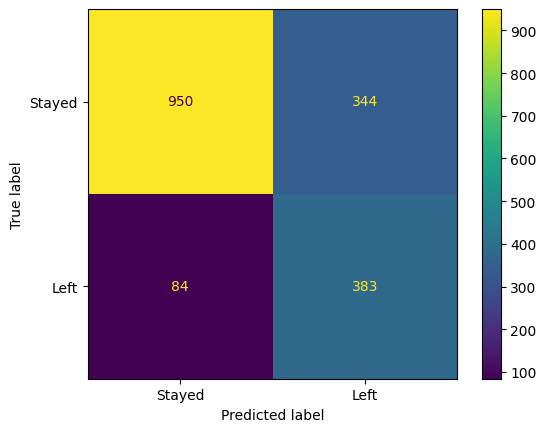

In [ ]:


ConfusionMatrixDisplay.from_estimator(clf_xgb,
                      X_test,
                      y_test,
                     values_format='d',
                      display_labels=["Stayed", "Left"])

In [ ]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 9.1 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
clf_xgb = xgb.XGBClassifier(seed=42,
                        objective='binary:logistic',
                        eval_metric="logloss",
                        gamma=0.25,
                        learning_rate=0.08,
                        max_depth=4,
                        reg_lambda=10,
                        scale_pos_weight=3,
                        subsample=0.9,
                        colsample_bytree=0.5,
                        use_label_encoder=False,
                        early_stopping_rounds=10,
                            )
clf_xgb.fit(X_train,
            y_train,
            verbose=True,


            eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.68630
[1]	validation_0-logloss:0.66350
[2]	validation_0-logloss:0.64398
[3]	validation_0-logloss:0.62728
[4]	validation_0-logloss:0.61220
[5]	validation_0-logloss:0.59792
[6]	validation_0-logloss:0.58653
[7]	validation_0-logloss:0.57550
[8]	validation_0-logloss:0.56556
[9]	validation_0-logloss:0.55727
[10]	validation_0-logloss:0.54993
[11]	validation_0-logloss:0.54230
[12]	validation_0-logloss:0.53664
[13]	validation_0-logloss:0.53125
[14]	validation_0-logloss:0.52638
[15]	validation_0-logloss:0.52223
[16]	validation_0-logloss:0.51904
[17]	validation_0-logloss:0.51538
[18]	validation_0-logloss:0.51144
[19]	validation_0-logloss:0.50800
[20]	validation_0-logloss:0.50526
[21]	validation_0-logloss:0.50258
[22]	validation_0-logloss:0.49981
[23]	validation_0-logloss:0.49764
[24]	validation_0-logloss:0.49547
[25]	validation_0-logloss:0.49398
[26]	validation_0-logloss:0.49244
[27]	validation_0-logloss:0.49066
[28]	validation_0-logloss:0.48915
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.25, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
explainer = shap.Explainer(clf_xgb)
shap_values = explainer(X_test)

# **9.The most important features**

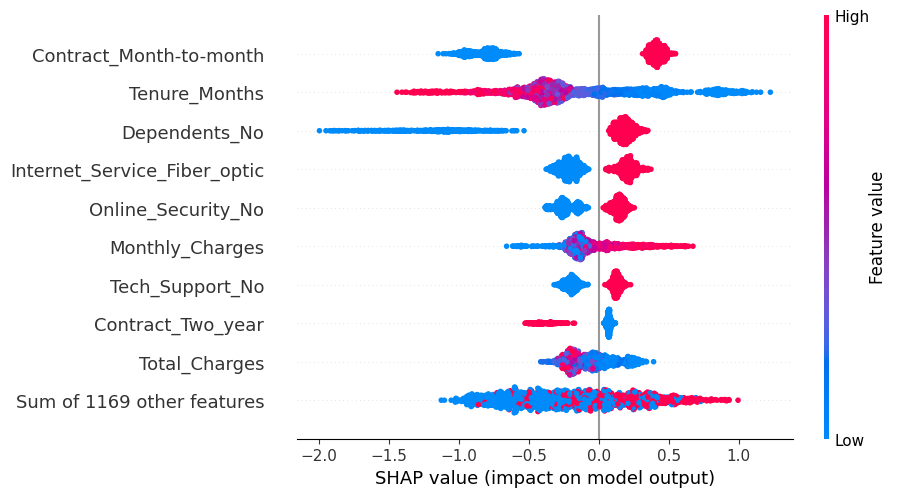

In [ ]:
shap.plots.beeswarm(shap_values)

# **References:**
#**[1].Data Structures, Algorithms, and Machine Learning Optimization, Jon Krohn-June 2021.**
#**[2]. Machine Learning With Go, Daniel Whitenack- September 2017.**
#**[3].Machine Learning with scikit-learn Quick Start Guide, Kevin Jolly-October 2018.**
#**[4].GitHub**

